In [2]:
# Import initial necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

# Settings of dataframe display
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = None

# Version requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.1
seaborn version :  0.13.2


## Load Dataset

In [3]:
df = pd.read_excel("DatabaseSHnP_paperICGERE.xlsx")

In [4]:
df.sample(10)

Thickness  Area  OilDensity     InjRate    InjTemp  Permeability  \
1754  24.052210   5.5   59.508891  1408.04750  348.55155    1738.50300   
5870  77.130590   5.0   61.099676   829.12846  421.93859    2979.50890   
5652  82.811420   7.5   61.781775   806.84929  314.98110    4210.84640   
2900  31.396151   4.0   61.659276   887.39450  298.54113    2323.27390   
3351  55.749082   4.5   61.939061   909.64004  368.77355    2797.44280   
1360  89.350558   5.5   60.070056   591.98307  454.34445    2648.72320   
5240  68.074532   4.5   60.056091   987.54958  283.03531     355.84062   
850   43.872415   7.0   61.401405  1208.65700  390.61107    2162.64760   
1520  65.804978   7.5   62.829019   930.74202  309.21374    1177.69470   
1932  65.923385   7.0   61.114975  1101.37830  486.86114    2080.35550   

          kVkH  Porosity   Pressure        Sw  Temperature    Xsteam  \
1754  0.156941  0.348965  808.68221  0.259437   118.089810  0.621237   
5870  0.176899  0.291837  939.47255  0.512018    94.687498  0.670367   
5652  0.133795  0.319371  252.27523  0.482922    92.306750  0.931072   
2900  0.198191  0.280722  779.58769  0.086422    69.978993  0.831663   
3351  0.176109  0.263405  684.20160  0.225941   109.994960  0.776278   
1360  0.207125  0.339472  954.88038  0.592658    82.179592  0.758858   
5240  0.293355  0.278724  240.61354  0.409159   115.292540  0.858165   
850   0.178314  0.294042  455.18682  0.510134   102.383470  0.645823   
1520  0.173252  0.303200  920.75966  0.629334    82.472814  0.740385   
1932  0.285403  0.282283  294.65261  0.268881    92.027762  0.600147   

         Swcon      Sorw     Sgcon      Sorg     Krocw    Krwiro     Krgcl  \
1754  0.354053  0.212921  0.092482  0.153350  0.581228  0.814276  0.927960   
5870  0.158731  0.256457  0.028090  0.137937  0.270505  0.728660  0.391319   
5652  0.227244  0.256169  0.029112  0.012518  0.756772  0.644499  0.478589   
2900  0.194822  0.121259  0.027782  0.197834  0.811544  0.613995  0.719989   
3351  0.310012  0.362263  0.063249  0.183867  0.772553  0.474195  0.423005   
1360  0.326242  0.153831  0.039946  0.087897  0.728517  0.763665  0.342653   
5240  0.348895  0.156034  0.011221  0.015026  0.497603  0.376319  0.322207   
850   0.300158  0.132576  0.027415  0.198531  0.851471  0.286577  0.603853   
1520  0.343690  0.439273  0.095328  0.113785  0.608284  0.359778  0.642152   
1932  0.334264  0.254402  0.011829  0.188388  0.804687  0.443965  0.701470   

      NW  NOW  NG  NOG     ViscA      ViscB  InjectionPeriod  SoakingPeriod  \
1754   3    4   3    4  0.000421  4150.2275                9             22   
5870   3    1   2    3  0.000525  3666.8499               11              4   
5652   2    3   2    1  0.000858  3528.2194               28             20   
2900   1    2   3    3  0.000895  3951.1477               15             27   
3351   1    2   2    4  0.000332  4334.9490               10              8   
1360   4    2   2    4  0.000695  4720.3270               10             29   
5240   2    1   1    4  0.000156  5060.4646               28             27   
850    4    4   3    2  0.000311  4991.9267               12             21   
1520   4    3   3    2  0.000218  4334.0617                7             21   
1932   2    4   4    2  0.000802  4426.0670               16              4   

      ProductionPeriod  InjProdPeriodRatio  InjSoakProdRatio  InjTime  \
1754                75            0.120000          0.413333        9   
5870               360            0.030556          0.041667       11   
5652               195            0.143590          0.246154       28   
2900                45            0.333333          0.933333       15   
3351               150            0.066667          0.120000       10   
1360               135            0.074074          0.288889       10   
5240                45            0.622222          1.222222       28   
850                150            0.080000          0.220000       12   
1520        

In [5]:
df.columns

Index(['Thickness', 'Area', 'OilDensity', 'InjRate', 'InjTemp', 'Permeability',
       'kVkH', 'Porosity', 'Pressure', 'Sw', 'Temperature', 'Xsteam', 'Swcon',
       'Sorw', 'Sgcon', 'Sorg', 'Krocw', 'Krwiro', 'Krgcl', 'NW', 'NOW', 'NG',
       'NOG', 'ViscA', 'ViscB', 'InjectionPeriod', 'SoakingPeriod',
       'ProductionPeriod', 'InjProdPeriodRatio', 'InjSoakProdRatio', 'InjTime',
       'SoakTime', 'ProdTime', 'Np', 'Qomax', 'Qo_End', 'P_End', 'T_End',
       'Sw_End', 'So_End', 'RFOil', 'OilVolumeSC', 'OilVolumeSC_End',
       'OilVolumeRC', 'OilVolumeRC_End', 'OilVolumeRC_Max', 'HCPV_Init',
       'HCPV_Max', 'OilSteamRatio', 'Wp', 'Qwmax', 'Wi', 'Qw_End',
       'P_StartProd', 'Pwf_StartProd', 'T_StartProd', 'NearWell_T_End',
       'NearWell_P_End', 'NearWell_T_StartProd', 'NearWell_P_StartProd',
       'NearWell_So_End', 'NearWell_So_StartProd', 'OilVisEnd', 'MinOilVis',
       'PV_init', 'PV_end', 'PV_Max', 'tQomax', 'StartProd', 'OilStartProd',
       'MinOilVisTime', 'tQomax

In [6]:
# Separate feature and target columns
all_columns = ['Thickness', 'Area', 'OilDensity', 'InjRate', 'InjTemp', 'Permeability',
               'kVkH', 'Porosity', 'Pressure', 'Sw', 'Temperature', 'Xsteam', 'Swcon',
               'Sorw', 'Sgcon', 'Sorg', 'Krocw', 'Krwiro', 'Krgcl', 'NW', 'NOW', 'NG',
               'NOG', 'ViscA', 'ViscB', 'InjectionPeriod', 'SoakingPeriod', 'ProductionPeriod', 'InjProdPeriodRatio',
               'InjSoakProdRatio', 'Qo_End', 'RFOil', 'OilSteamRatio']

feature_columns = ['Thickness', 'Area', 'OilDensity', 'InjRate', 'InjTemp', 'Permeability',
                   'kVkH', 'Porosity', 'Pressure', 'Sw', 'Temperature', 'Xsteam', 'Swcon',
                   'Sorw', 'Sgcon', 'Sorg', 'Krocw', 'Krwiro', 'Krgcl', 'NW', 'NOW', 'NG',
                   'NOG', 'ViscA', 'ViscB']

target_columns = ['InjectionPeriod', 'SoakingPeriod', 'ProductionPeriod', 'InjProdPeriodRatio',
                  'InjSoakProdRatio', 'Qo_End', 'RFOil', 'OilSteamRatio']

In [7]:
# Filter the columns for EDA process
df = df[all_columns]

In [8]:
# Checking shape of dataframe
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns {df.shape[1]}')

Number of rows: 5949
Number of columns 33


In [9]:
# Dataset overview
desc_col = []

for col in df.columns :
    desc_col.append([col, df[col].dtype, df[col].isna().sum(), round(df[col].isna().sum()/len(df) * 100, 2), df.duplicated().sum(), df[col].nunique(), df[col].unique()[:5]])

desc_df = pd.DataFrame(data=desc_col, columns='Feature, Data Type, Null Values, Null Percentage (%), Duplicated Values, Unique Values, 5 Unique Sample'.split(","))
desc_df

Feature  Data Type   Null Values   Null Percentage (%)  \
0            Thickness    float64             0                   0.0   
1                 Area    float64             0                   0.0   
2           OilDensity    float64             0                   0.0   
3              InjRate    float64             0                   0.0   
4              InjTemp    float64             0                   0.0   
5         Permeability    float64             0                   0.0   
6                 kVkH    float64             0                   0.0   
7             Porosity    float64             0                   0.0   
8             Pressure    float64             0                   0.0   
9                   Sw    float64             0                   0.0   
10         Temperature    float64             0                   0.0   
11              Xsteam    float64             0                   0.0   
12               Swcon    float64             0                   0.0   
13                Sorw    float64             0                   0.0   
14               Sgcon    float64             0                   0.0   
15                Sorg    float64             0                   0.0   
16               Krocw    float64             0                   0.0   
17              Krwiro    float64             0                   0.0   
18               Krgcl    float64             0                   0.0   
19                  NW      int64             0                   0.0   
20                 NOW      int64             0                   0.0   
21                  NG      int64             0                   0.0   
22                 NOG      int64             0                   0.0   
23               ViscA    float64             0                   0.0   
24               ViscB    float64             0                   0.0   
25     InjectionPeriod      int64             0                   0.0   
26       SoakingPeriod      int64             0                   0.0   
27    ProductionPeriod      int64             0                   0.0   
28  InjProdPeriodRatio    float64             0                   0.0   
29    InjSoakProdRatio    float64             0                   0.0   
30              Qo_End    float64             0                   0.0   
31               RFOil    float64             0                   0.0   
32       OilSteamRatio    float64             0                   0.0   

     Duplicated Values   Unique Values  \
0                    0            5949   
1                    0              15   
2                    0            5945   
3                    0            5949   
4                    0            5949   
5                    0            5949   
6                    0            5949   
7                    0            5946   
8                    0            5949   
9                    0            5949   
10                   0            5948   
11                   0            5949   
12                   0            5949   
13                   0            5949   
14                   0            5949   
15                   0            5948   
16                   0            5949   
17                   0            5947   
18                   0            5949   
19                   0               4   
20                   0               4   
21                   0               4   
22                   0               4   
23                   0            5949   
24                   0            5949   
25                   0              24   
26                   0              28   
27                   0              23   
28                   0             372   
29                   0             730   
30                   0            5208   
31                   0            5948   
32                   0            5949   

                                                                                             5 Unique S

The dataset has no issues in terms of data type formatting, null values, or duplicated values.

- Numerical (Continuous) columns (26 columns) :

    - `'Thickness', 'Area', 'OilDensity', 'InjRate', 'InjTemp', 'Permeability', 'kVkH', 'Porosity', 'Pressure', 'Sw', 'Temperature', 'Xsteam', 'Swcon', 'Sorw', 'Sgcon', 'Sorg', 'Krocw', 'Krwiro', 'Krgcl', 'ViscA', 'ViscB', 'InjProdPeriodRatio', 'InjSoakProdRatio', 'Qo_End', 'RFOil', 'OilSteamRatio'`

- Numerical (Discrete) columns (7 columns) : (need more context, all of these could be continuous)
    - `'NW', 'NOW', 'NG', 'NOG', 'InjectionPeriod', 'SoakingPeriod', 'ProductionPeriod'`


# **STAGE 1 : EXPLORATORY DATA ANALYSIS (EDA)**

## Statistical Summary

In [10]:
# ?st.variation

In [11]:
# Numerical columns
nums_summary = df.describe().transpose()
nums_summary['range'] = nums_summary['max'] - nums_summary['min']
# nums_summary['var'] = st.variation(df.values)
nums_summary['coefficient of variation'] = (nums_summary['std'] / nums_summary['mean']) * 100

nums_summary

count         mean          std           min  \
Thickness           5949.0    59.655512    23.129914  2.003194e+01   
Area                5949.0     3.932426     2.186605  5.000000e-01   
OilDensity          5949.0    61.034066     1.062648  5.666834e+01   
InjRate             5949.0   811.334666   265.155691  2.037951e+02   
InjTemp             5949.0   368.168357    51.677376  2.534122e+02   
Permeability        5949.0  2779.948179  1475.150241  1.017303e+02   
kVkH                5949.0     0.200710     0.057747  1.000112e-01   
Porosity            5949.0     0.306935     0.042116  1.394895e-01   
Pressure            5949.0   554.366586   240.568255  1.002665e+02   
Sw                  5949.0     0.343384     0.164541  8.700708e-04   
Temperature         5949.0    96.085093    18.001918  5.015740e+01   
Xsteam              5949.0     0.773808     0.101601  6.000294e-01   
Swcon               5949.0     0.258579     0.086676  1.000684e-01   
Sorw                5949.0     0.266351     0.101079  1.001346e-01   
Sgcon               5949.0     0.050076     0.028819  5.242415e-07   
Sorg                5949.0     0.100282     0.058097  6.180722e-06   
Krocw               5949.0     0.605442     0.230282  2.001219e-01   
Krwiro              5949.0     0.592888     0.231341  2.000429e-01   
Krgcl               5949.0     0.601750     0.233067  2.002433e-01   
NW                  5949.0     2.583291     1.114644  1.000000e+00   
NOW                 5949.0     2.457220     1.120390  1.000000e+00   
NG                  5949.0     2.472516     1.125360  1.000000e+00   
NOG                 5949.0     2.515885     1.120344  1.000000e+00   
ViscA               5949.0     0.000537     0.000261  1.000974e-04   
ViscB               5949.0  4319.743137   553.732581  3.012244e+03   
InjectionPeriod     5949.0    18.565977     6.905737  7.000000e+00   
SoakingPeriod       5949.0    16.514540     8.112213  3.000000e+00   
ProductionPeriod    5949.0   195.307615    99.516895  3.000000e+01   
InjProdPeriodRatio  5949.0     0.148398     0.152870  1.944444e-02   
InjSoakProdRatio    5949.0     0.279606     0.273932  3.174603e-02   
Qo_End              5949.0    61.177327   157.562865  0.000000e+00   
RFOil               5949.0     5.764389     8.114223  1.054777e-02   
OilSteamRatio       5949.0    15.613459   430.949363  3.216089e-03   

                            25%          50%          75%           max  \
Thickness             39.583709    59.649816    79.486605     99.953139   
Area                   2.000000     4.000000     6.000000      7.500000   
OilDensity            60.308377    61.059831    61.805859     63.299332   
InjRate              623.062030   796.963710   996.543540   1496.683600   
InjTemp              330.096570   365.420260   404.482800    499.101850   
Permeability        1680.854200  2650.241300  3783.772900   8694.562800   
kVkH                   0.150946     0.200011     0.252029      0.299960   
Porosity               0.278746     0.307892     0.337775      0.399933   
Pressure             371.736870   539.099710   715.856590   1492.336000   
Sw                     0.223270     0.349038     0.456658      0.861834   
Temperature           83.479869    95.152711   107.980580    162.774780   
Xsteam                 0.685543     0.774358     0.860750      0.949900   
Swcon                  0.185732     0.262793     0.334168      0.399890   
Sorw                   0.176026     0.263249     0.352646      0.449933   
Sgcon                  0.025139     0.050421     0.075233      0.099977   
Sorg                   0.049699     0.100850     0.150348      0.199955   
Krocw                  0.404836     0.609054     0.803302      0.999946   
Krwiro                 0.394091     0.585485     0.791638      0.999892   
Krgcl                  0.401192     0.598902     0.801340      0.999959   
NW                     2.000000     3.000000     4.000000      4.000000   
NOW                    1.000000     2.000000     3.000000      4.

## Univariate Analysis

### Numerical

In [12]:
len(all_columns)

33

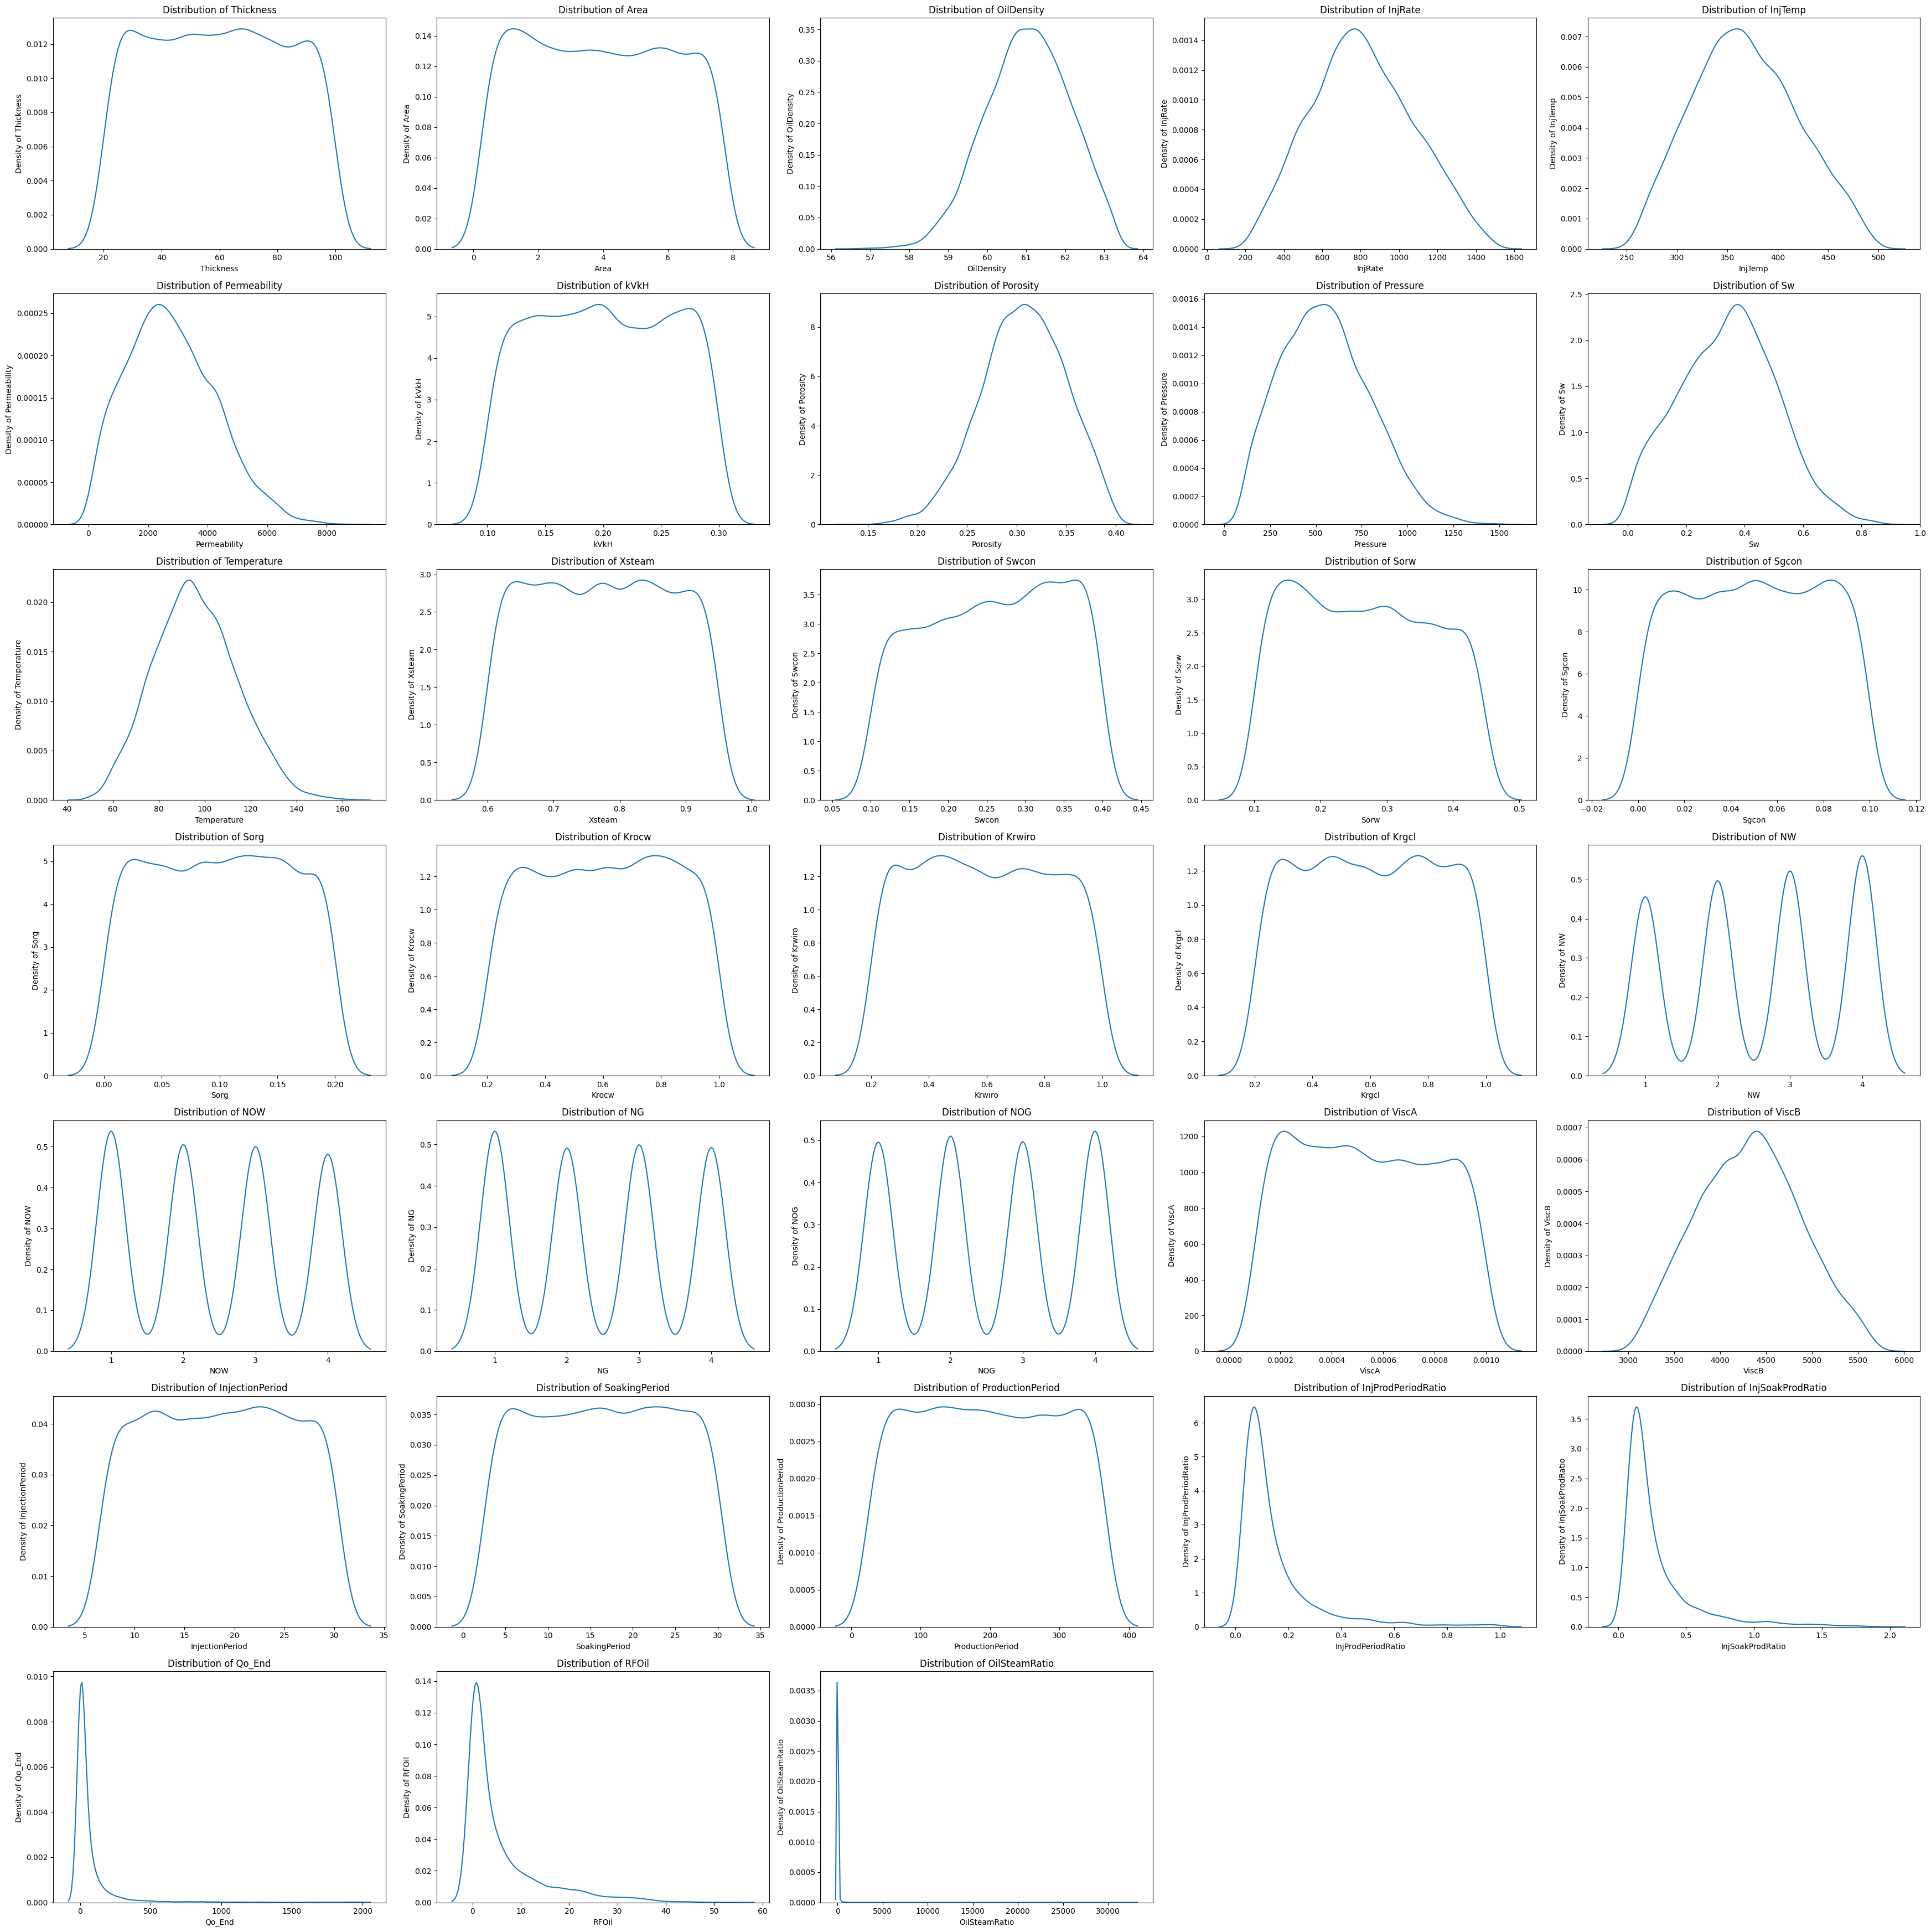

In [13]:
# Kdeplot
fig, ax = plt.subplots(nrows=7, ncols=5, figsize=(35, 35))
ax = ax.flatten()

for i, col in enumerate(all_columns) :
    sns.kdeplot(data=df, x=col, ax=ax[i])
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_ylabel(f'Density of {col}')
    ax[i].set_xlabel(f'{col}')

# Hide the 34th and 35th plots (index 33 and 34)
ax[33].axis('off')
ax[34].axis('off')

plt.tight_layout()
plt.show()

In [14]:
# ?st.probplot

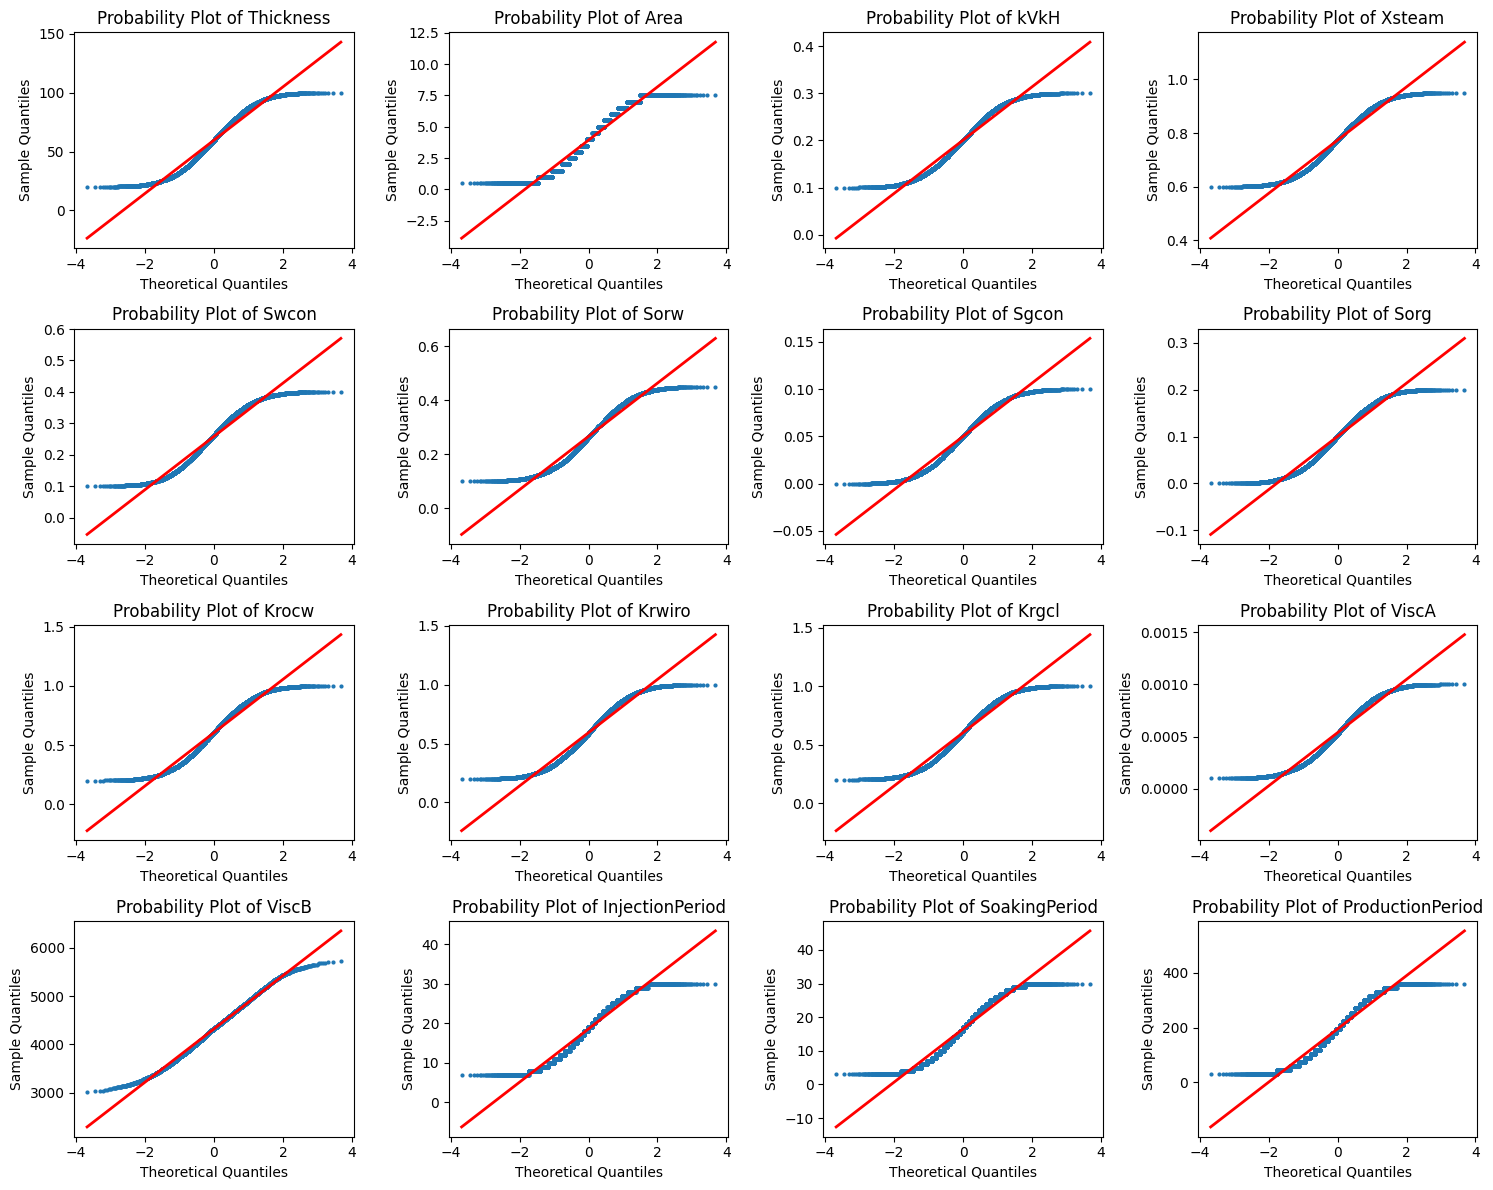

In [15]:
# Quantile-quantile (Q-Q) plot
columns_to_check = ["Thickness", "Area", "kVkH", "Xsteam", "Swcon", "Sorw", "Sgcon", "Sorg",
                    "Krocw", "Krwiro", "Krgcl", "ViscA", "ViscB", "InjectionPeriod", "SoakingPeriod", "ProductionPeriod"]

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(columns_to_check):
    (osm, osr), (slope, intercept, r) = st.probplot(df[col].values, dist="norm")
    axes[i].plot(osm, osr, 'o', markersize=2)
    axes[i].plot(osm, slope * osm + intercept, 'r', linewidth=2)
    axes[i].set_title(f'Probability Plot of {col}')
    axes[i].set_xlabel('Theoretical Quantiles')
    axes[i].set_ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()


In [16]:
from scipy.stats import skew, kurtosis, kstest
from diptest import diptest

def analyze_distribution(df, all_columns):
    distribution_type_list = []
    skew_val_list = []
    kurtosis_val_list = []
    p_value_ks_list = []
    p_value_dip_list = []
    mean_list = []
    median_list = []
    mode_list = []

    for column in all_columns:
        data = df[column].dropna()

        mean = round(data.mean(), 3)
        median = data.median()
        mode = data.mode().iloc[0]  # Take the first mode if there are multiple

        skew_val = round(skew(data, nan_policy="omit"), 3)
        kurtosis_val = round(kurtosis(data, nan_policy="omit"), 3)

        # Scale data to the range [0, 1]
        data_min, data_max = data.min(), data.max()
        scaled_data = (data - data_min) / (data_max - data_min)

        threshold_pvalue = 0.05

        try:
            # Kolmogorov-Smirnov Test for uniform distribution
            _, p_value_ks = kstest(scaled_data, 'uniform')

            # Perform Dip Test for multimodal distribution
            _, p_value_dip = diptest(data)

            # Determine the type of distribution
            if p_value_dip < threshold_pvalue:
                distribution_type = "Multimodal Distribution"
            elif p_value_ks > threshold_pvalue and abs(kurtosis_val + 1.2) < 0.5:
                distribution_type = "Uniform Distribution"

            elif abs(skew_val) < 0.2 and abs(kurtosis_val) < 0.2:
                distribution_type = "Normal Distribution (Symmetric)"
                
            else:
                # Use mean-median-mode relationship
                if mean < median < mode:
                    distribution_type = "Negatively Skewed"
                elif mean > median > mode:
                    distribution_type = "Positively Skewed"
                else:
                    # Fallback to skewness value if mean-median-mode relationship is inconclusive
                    if skew_val < -0.2:
                        distribution_type = "Negatively Skewed"
                    elif skew_val > 0.2:
                        distribution_type = "Positively Skewed"
                    else:
                        distribution_type = "Approximately Symmetric"

                # Add intensity of skewness
                if abs(skew_val) >= 1:
                    distribution_type = "Highly " + distribution_type
                elif abs(skew_val) >= 0.5:
                    distribution_type = "Moderately " + distribution_type

            distribution_type_list.append(distribution_type)
            skew_val_list.append(skew_val)
            kurtosis_val_list.append(kurtosis_val)
            p_value_ks_list.append(round(p_value_ks, 3))
            p_value_dip_list.append(round(p_value_dip, 3))
            mean_list.append(mean)
            median_list.append(median)
            mode_list.append(mode)
        
        except Exception as e:
            print(f"Error processing column {column}: {str(e)}")
            
    dist = pd.DataFrame({
        "Column Name": all_columns,
        "Mean": mean_list,
        "Median": median_list,
        "Mode": mode_list,
        "Skewness": skew_val_list,
        "Kurtosis": kurtosis_val_list,
        "p-value_ks": p_value_ks_list,
        "p-value_dip": p_value_dip_list,
        "Type of Distribution": distribution_type_list
    })

    return dist

result = analyze_distribution(df, all_columns)
result

Column Name      Mean       Median          Mode  Skewness  \
0            Thickness    59.656    59.649816  2.003194e+01     0.013   
1                 Area     3.932     4.000000  1.000000e+00     0.038   
2           OilDensity    61.034    61.059831  6.014005e+01    -0.211   
3              InjRate   811.335   796.963710  2.037951e+02     0.158   
4              InjTemp   368.168   365.420260  2.534122e+02     0.172   
5         Permeability  2779.948  2650.241300  1.017303e+02     0.429   
6                 kVkH     0.201     0.200011  1.000112e-01     0.001   
7             Porosity     0.307     0.307892  2.834405e-01    -0.230   
8             Pressure   554.367   539.099710  1.002665e+02     0.388   
9                   Sw     0.343     0.349038  8.700708e-04     0.094   
10         Temperature    96.085    95.152711  1.155930e+02     0.235   
11              Xsteam     0.774     0.774358  6.000294e-01     0.009   
12               Swcon     0.259     0.262793  1.000684e-01    -0.128   
13                Sorw     0.266     0.263249  1.001346e-01     0.099   
14               Sgcon     0.050     0.050421  5.242415e-07    -0.020   
15                Sorg     0.100     0.100850  1.006425e-01    -0.005   
16               Krocw     0.605     0.609054  2.001219e-01    -0.030   
17              Krwiro     0.593     0.585485  9.354376e-01     0.036   
18               Krgcl     0.602     0.598902  2.002433e-01     0.000   
19                  NW     2.583     3.000000  4.000000e+00    -0.098   
20                 NOW     2.457     2.000000  1.000000e+00     0.048   
21                  NG     2.473     2.000000  1.000000e+00     0.027   
22                 NOG     2.516     3.000000  4.000000e+00    -0.012   
23               ViscA     0.001     0.000526  1.000974e-04     0.068   
24               ViscB  4319.743  4324.674300  3.012244e+03     0.069   
25     InjectionPeriod    18.566    19.000000  2.300000e+01    -0.011   
26       SoakingPeriod    16.515    17.000000  1.700000e+01    -0.010   
27    ProductionPeriod   195.308   195.000000  6.000000e+01     0.012   
28  InjProdPeriodRatio     0.148     0.095238  6.666667e-02     2.742   
29    InjSoakProdRatio     0.280     0.177778  1.333333e-01     2.590   
30              Qo_End    61.177    11.979492  0.000000e+00     6.443   
31               RFOil     5.764     2.182558  4.242272e-01     2.031   
32       OilSteamRatio    15.613     0.948753  3.216089e-03    75.808   

    Kurtosis  p-value_ks  p-value_dip      Type of Distribution  
0     -1.195       0.627        0.586      Uniform Distribution  
1     -1.239       0.000        0.000   Multimodal Distribution  
2     -0.262       0.000        0.962         Negatively Skewed  
3     -0.558       0.000        0.999         Positively Skewed  
4     -0.618       0.000        1.000         Positively Skewed  
5     -0.208       0.000        0.993         Positively Skewed  
6     -1.199       0.425        0.045   Multimodal Distribution  
7     -0.229       0.000        0.995         Negatively Skewed  
8     -0.225       0.000        0.753         Positively Skewed  
9     -0.421       0.000        0.995   Approximately Symmetric  
10    -0.140       0.000        0.999         Positively Skewed  
11    -1.207       0.635        0.535      Uniform Distribution  
12    -1.181       0.000        0.992   Approximately Symmetric  
13    -1.201       0.000        0.932         Positively Skewed  
14    -1.197       0.893        0.782      Uniform Distribution  
15    -1.195       0.646        0.417      Uniform Distribution  
16    -1.198       0.148        0.776      Uniform Distribution  
17    -1.201       0.035        0.698   Approximately Symmetric  
18    -1.216       0.496        0.260      Uniform Distribution  
19    -1.345       0.000        0.000   Multimodal Distribution  
20    -1.364       0.000        0.000   Multimodal Distribution  
21    -1.376       0.000        0.000   Multimodal Distribution  
22    -1.3

Distribution types of each numerical column can be seen in above dataframe.

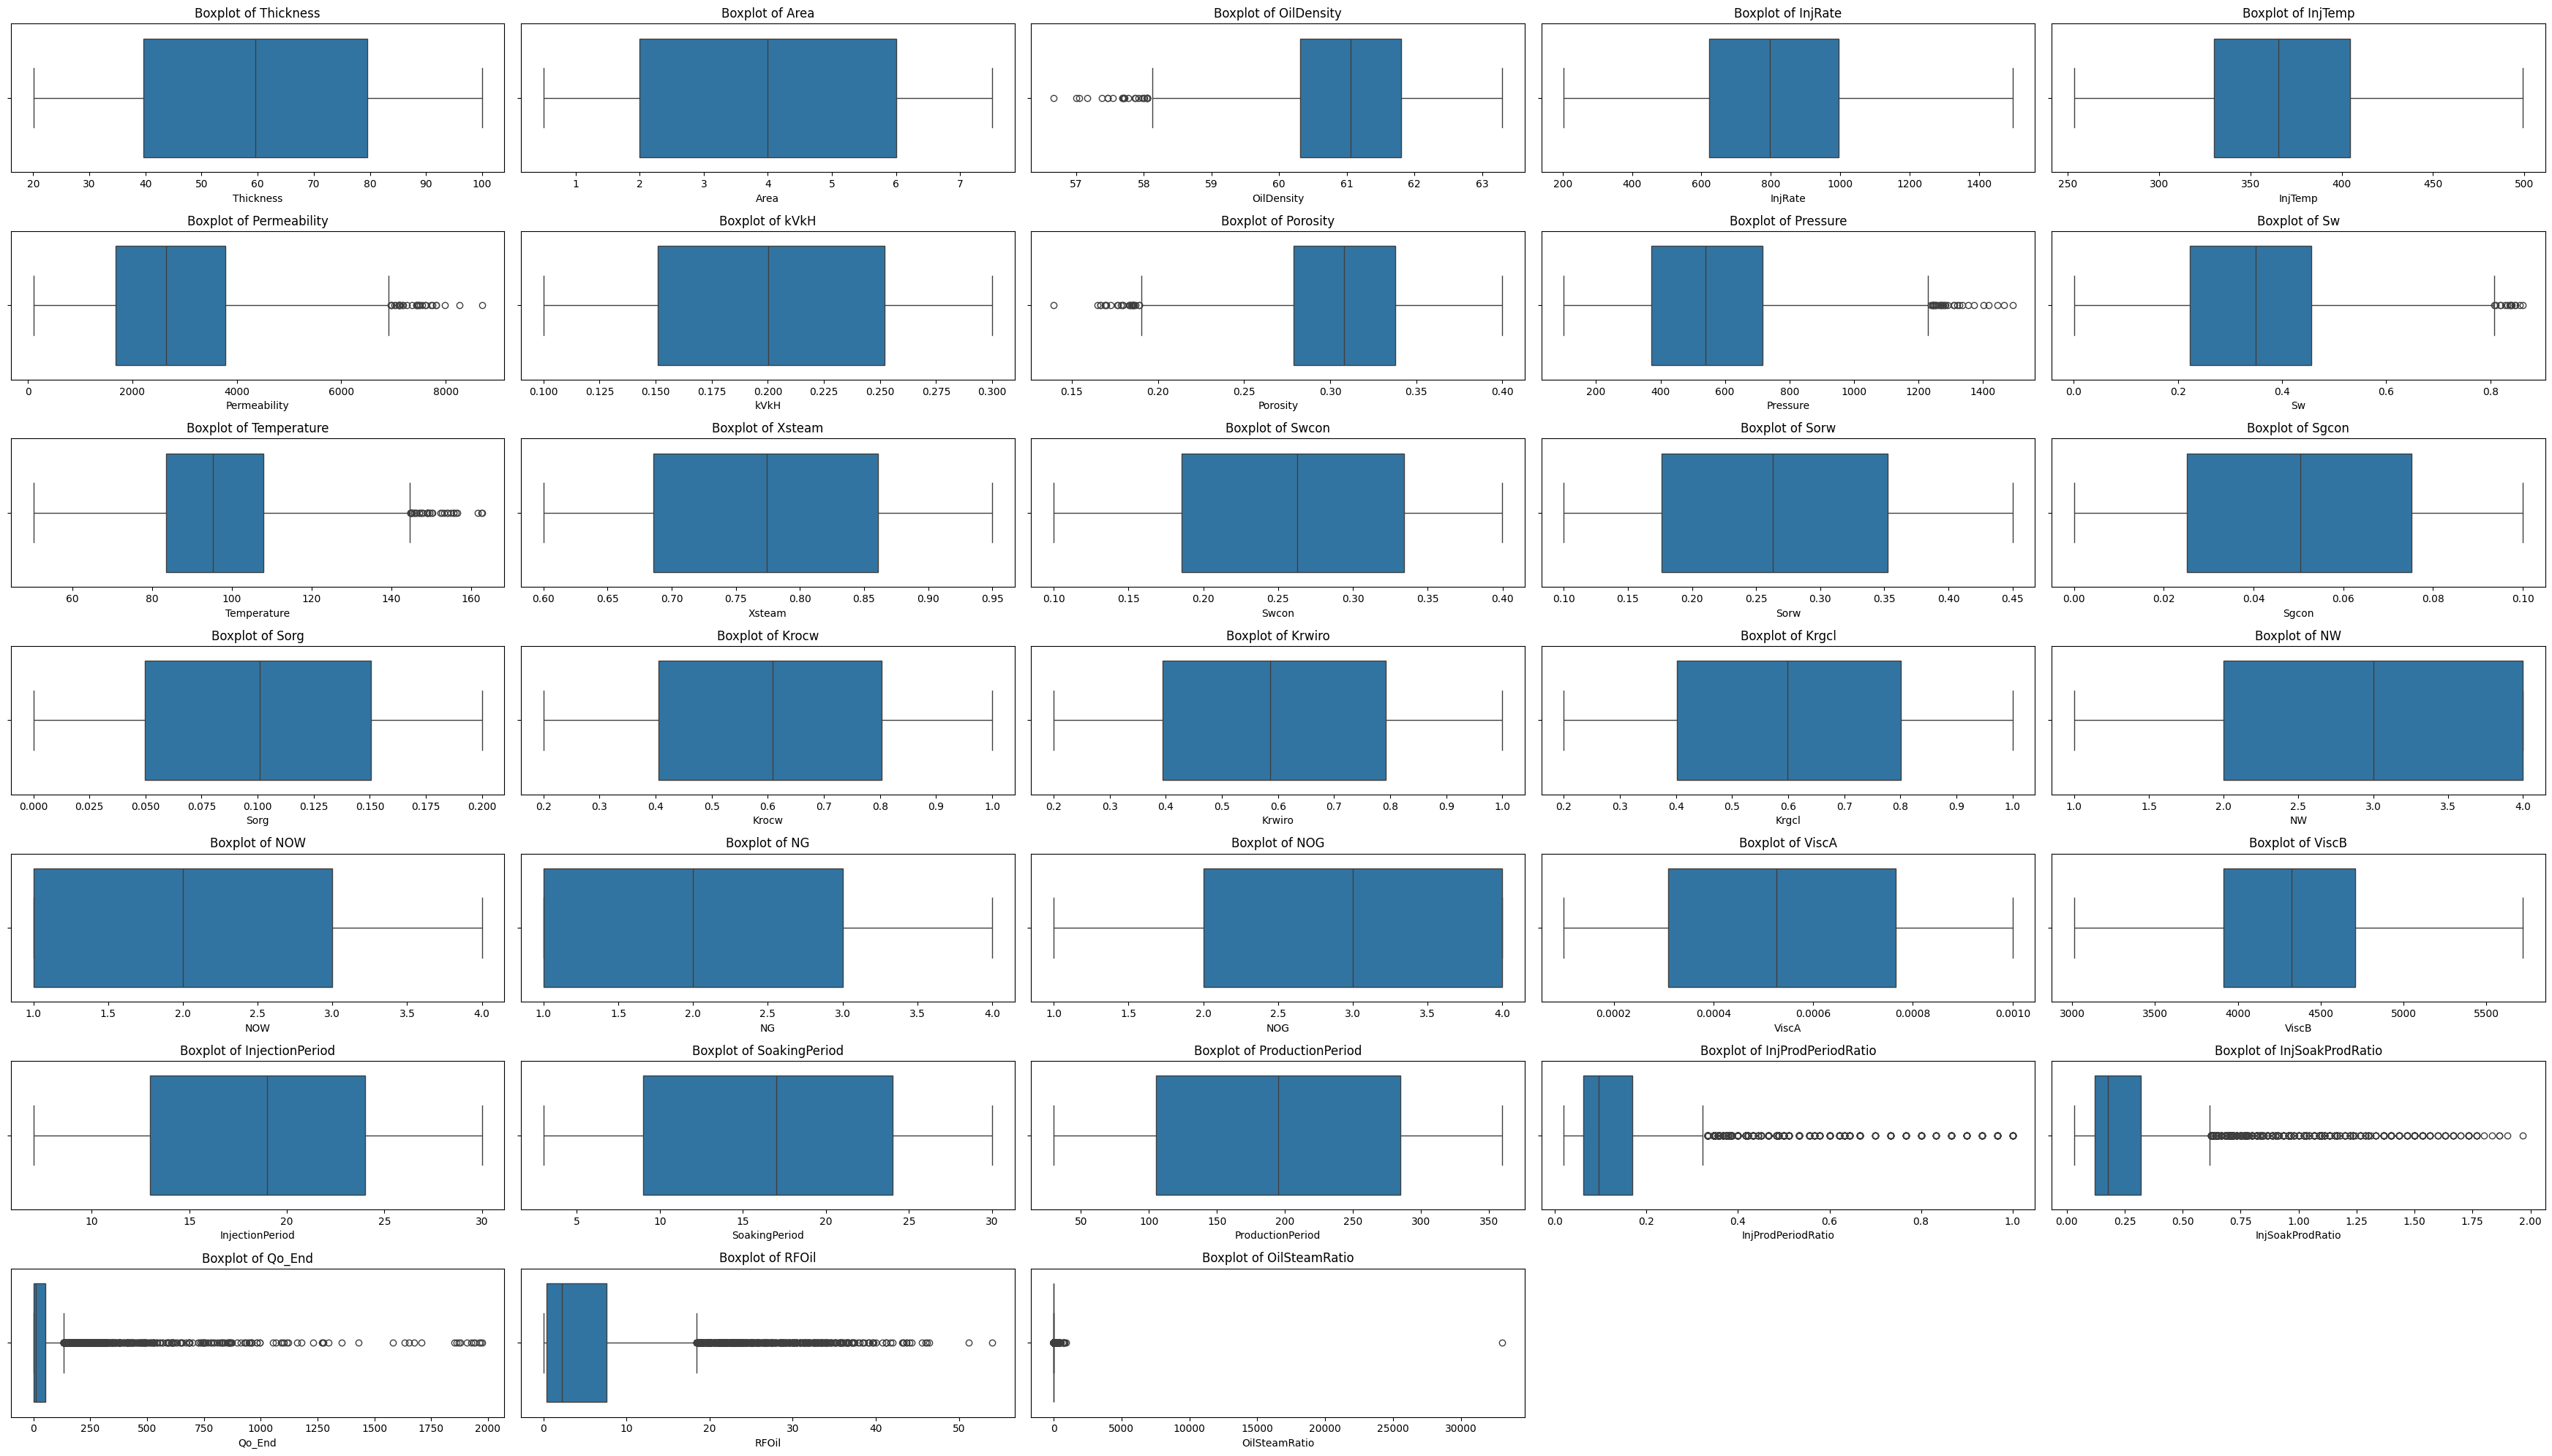

In [17]:
# Boxplot
fig, ax = plt.subplots(nrows=7, ncols=5, figsize=(35, 20))
ax = ax.flatten()

for i, col in enumerate(all_columns) :
    sns.boxplot(data=df, ax=ax[i], x=col)
    ax[i].set_title(f'Boxplot of {col}')

# Hide the 34th and 35th plots (index 33 and 34)
ax[33].axis('off')
ax[34].axis('off')

plt.tight_layout()
plt.show()

Some of the columns have outliers, but not sure yet whether I should filter them or not since I don't really understand the context or domain importance of the columns. So as for now we will keep just keep it that way. If we need to filter them out then we will be using the code of filtering in data processing

In [18]:
# Outlier detection for original data
print(f'Amount of Rows: {len(df)}')

outlier = []
no_outlier = []
is_outlier = []
low_bound = []
high_bound = []

filtered_entries = np.array([True] * len(df))

for col in all_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    filter_outlier = ((df[col] >= lower_bound) & (df[col] <= upper_bound))

    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_bound.append(lower_bound)
    high_bound.append(upper_bound)

    filtered_entries = ((df[col] >= lower_bound) & (df[col] <= upper_bound)) & filtered_entries

print(f'Amount of Outlier Rows : {len(df[~filtered_entries])}')
print(f'Amount of Non-Outlier Rows : {len(df[filtered_entries])}')
print(f'Percentage of Outliers : {round(len(df[~filtered_entries]) / len(df) * 100, 2)}')
print()

percentage_outlier = np.array(outlier) / len(df) * 100
check_outliers = pd.DataFrame({
    'Column Name':all_columns,
    'Outlier Exist': is_outlier,
    'Lower Limit': low_bound,
    'Upper Limit': high_bound,
    'Outlier Data': outlier,
    'Non-Outlier Data': no_outlier,
    'Percentage of Outlier': percentage_outlier
})

check_outliers

Amount of Rows: 5949
Amount of Outlier Rows : 2232
Amount of Non-Outlier Rows : 3717
Percentage of Outliers : 37.52



Column Name  Outlier Exist  Lower Limit  Upper Limit  Outlier Data  \
0            Thickness          False   -20.270635   139.340949             0   
1                 Area          False    -4.000000    12.000000             0   
2           OilDensity           True    58.062154    64.052082            25   
3              InjRate          False    62.839765  1556.765805             0   
4              InjTemp          False   218.517225   516.062145             0   
5         Permeability           True -1473.523850  6938.150950            31   
6                 kVkH          False    -0.000680     0.403655             0   
7             Porosity           True     0.190202     0.426319            26   
8             Pressure           True  -144.442710  1232.036170            30   
9                   Sw           True    -0.126812     0.806739            14   
10         Temperature           True    46.728802   144.731647            36   
11              Xsteam          False     0.422732     1.123561             0   
12               Swcon          False    -0.036922     0.556822             0   
13                Sorw          False    -0.088904     0.617576             0   
14               Sgcon          False    -0.050003     0.150375             0   
15                Sorg          False    -0.101274     0.301321             0   
16               Krocw          False    -0.192864     1.401001             0   
17              Krwiro          False    -0.202230     1.387959             0   
18               Krgcl          False    -0.199030     1.401562             0   
19                  NW          False    -1.000000     7.000000             0   
20                 NOW          False    -2.000000     6.000000             0   
21                  NG          False    -2.000000     6.000000             0   
22                 NOG          False    -1.000000     7.000000             0   
23               ViscA          False    -0.000376     0.001451             0   
24               ViscB          False  2717.791350  5902.498950             0   
25     InjectionPeriod          False    -3.500000    40.500000             0   
26       SoakingPeriod          False   -13.500000    46.500000             0   
27    ProductionPeriod          False  -165.000000   555.000000             0   
28  InjProdPeriodRatio           True    -0.101768     0.332576           567   
29    InjSoakProdRatio           True    -0.176970     0.618182           563   
30              Qo_End           True   -78.408691   133.001464           663   
31               RFOil           True   -10.431145    18.436656           561   
32       OilSteamRatio           True    -4.730385     8.310180           699   

    Non-Outlier Data  Percentage of Outlier  
0               5949               0.000000  
1               5949               0.000000  
2               5924               0.420239  
3               5949               0.000000  
4               5949               0.000000  
5               5918               0.521096  
6               5949               0.000000  
7               5923               0.437048  
8               5919               0.504286  
9               5935               0.235334  
10              5913               0.605144  
11              5949               0.000000  
12              5949               0.000000  
13              5949               0.000000  
14              5949               0.000000  
15              5949               0.000000  
16              5949               0.000000  
17              5949               0.000000  
18              5949               0.000000  
19              5949               0.000000  
20              5949               0.000000  
21              5949               0.000000  
22              5949               0.000000  
23              5949               0.000000  
24              5949               0.000000  
25              5949               0.000000  
26            

**The missing values are mostly on the target variables.**

## Multivariate Analysis

In [19]:
# # Pairplot of numerical features
# sns.pairplot(data=df, diag_kind='kde')
# plt.tight_layout()
# plt.show()

Mostly the relation are non-linear, so we will be using spearmann method to check the correlation value.

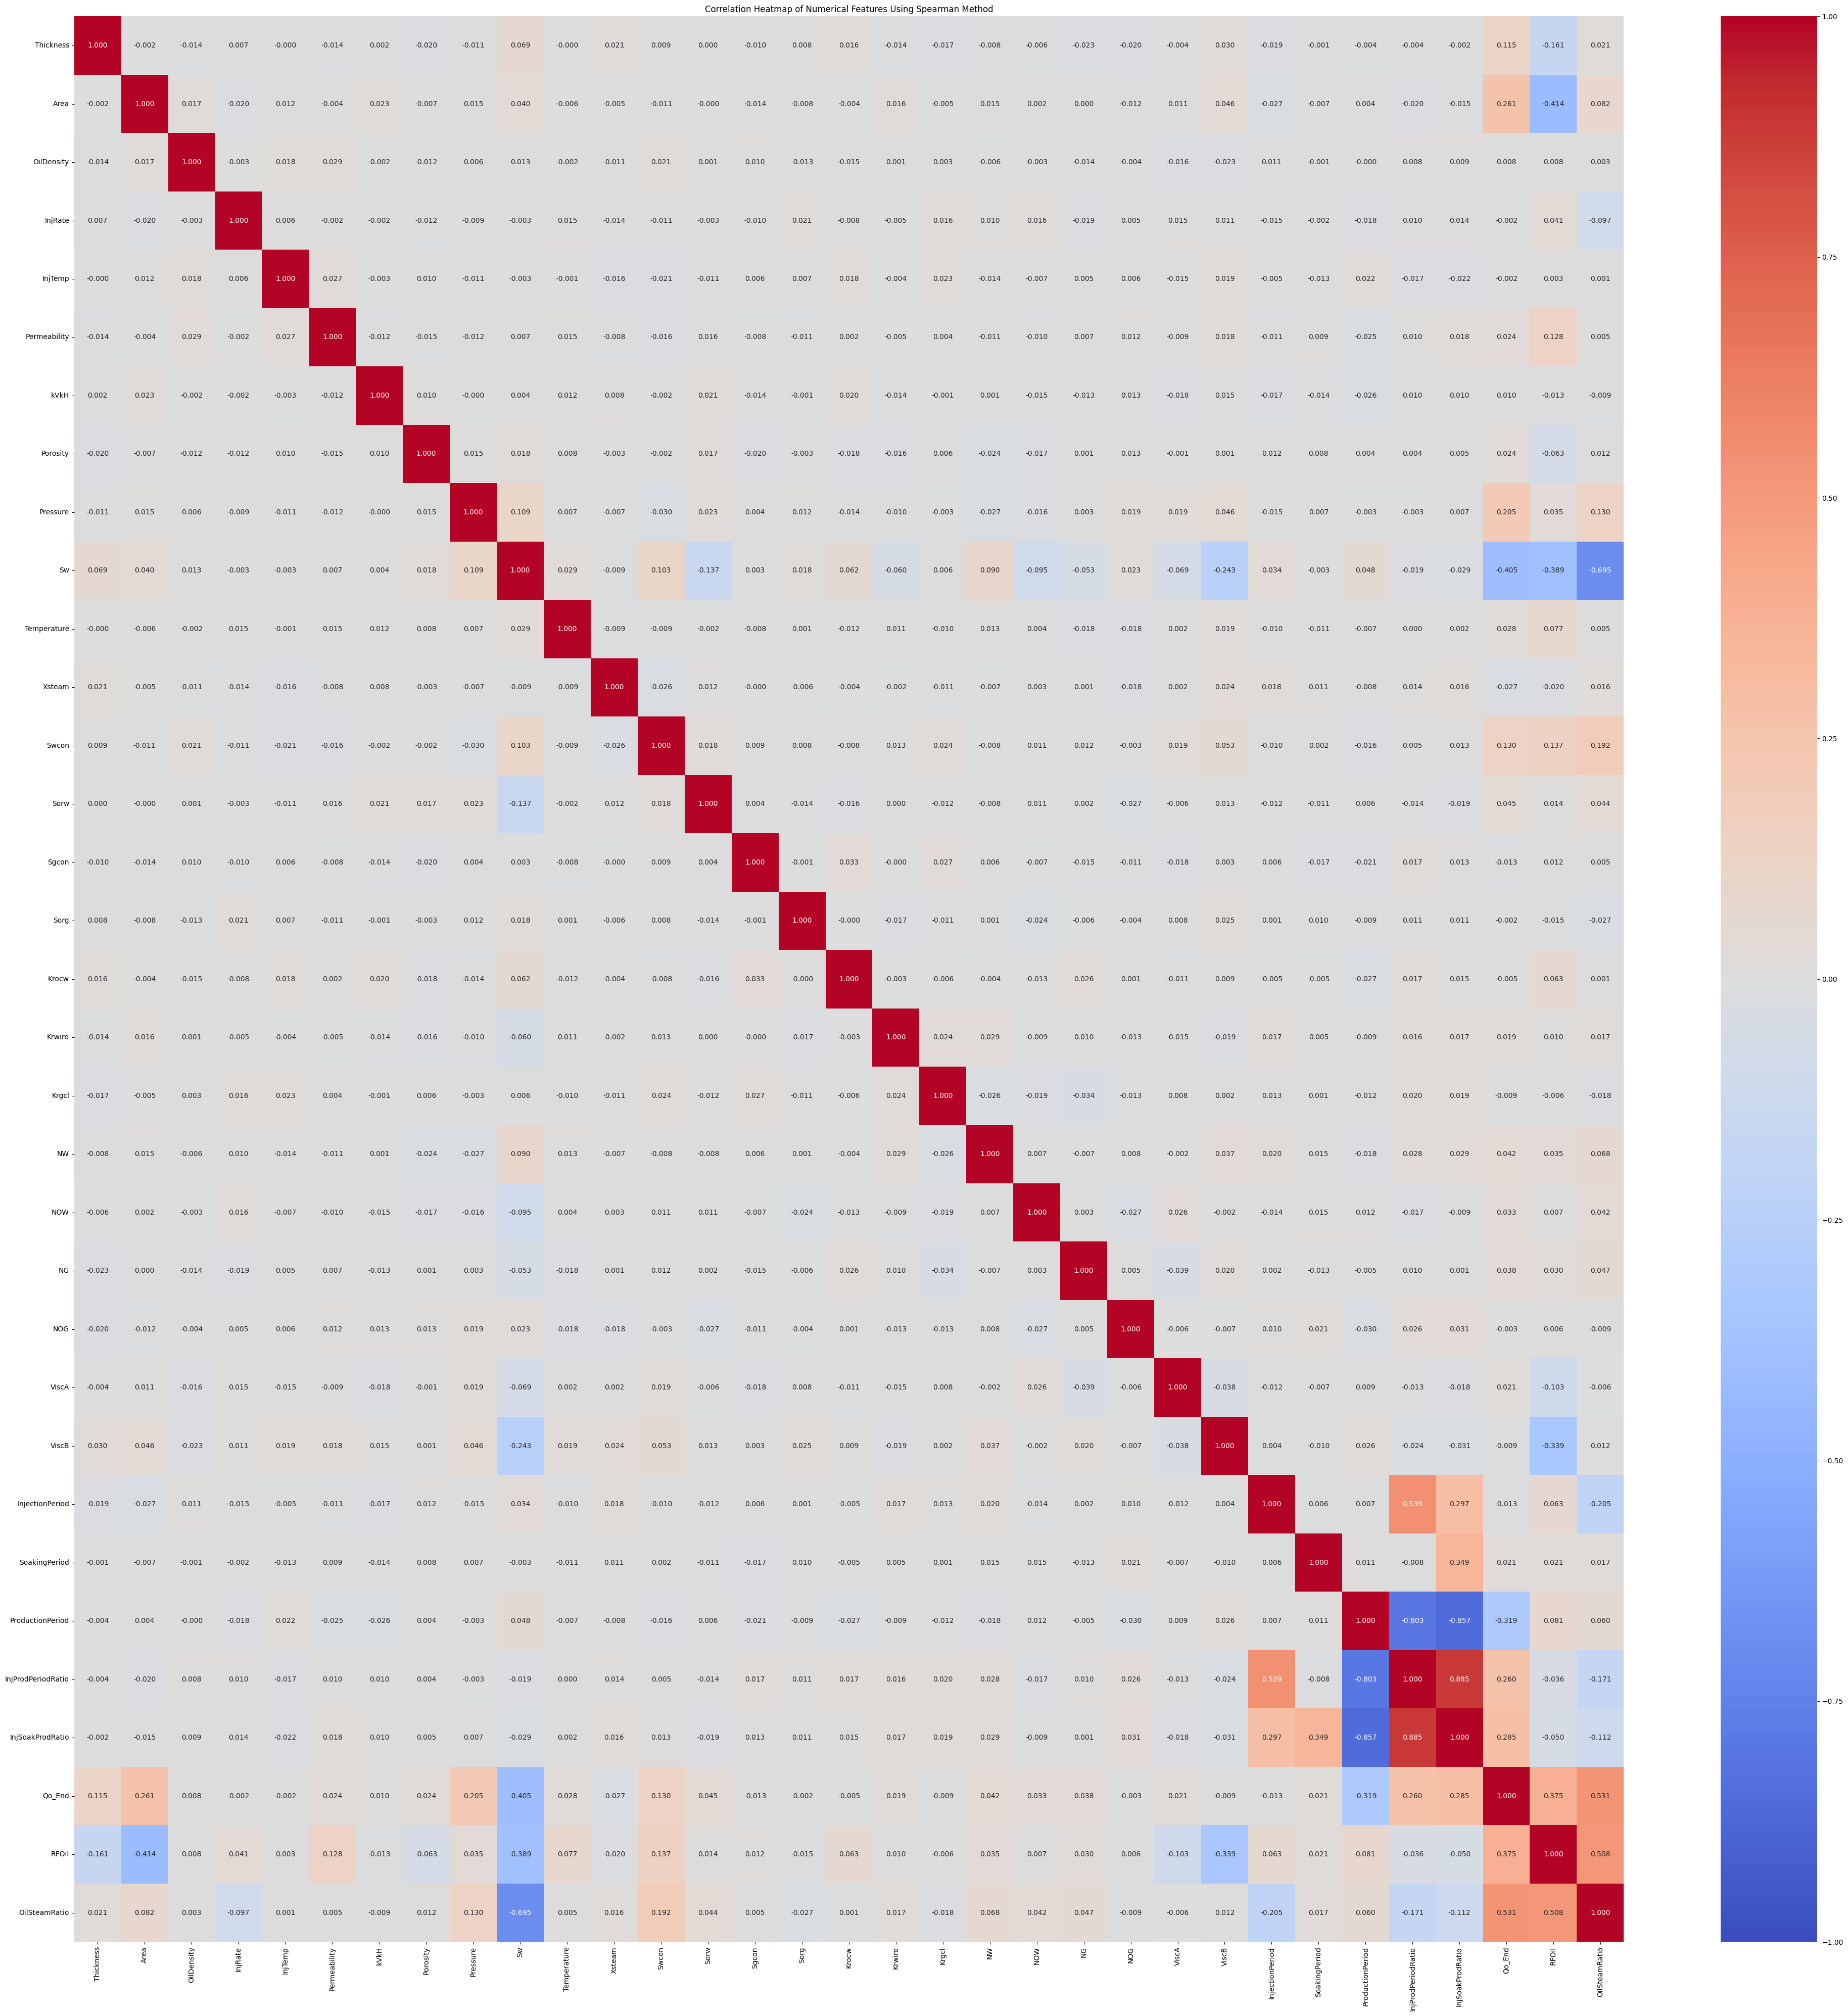

In [20]:
# Heatmap of numerical values (Spearman method)
# fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 20))

plt.figure(figsize=(40, 40))
sns.heatmap(data=df.corr(method='spearman', numeric_only=True),annot=True, cmap='coolwarm', fmt='.3f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features Using Spearman Method')

# sns.heatmap(data=df.corr(method='kendall', numeric_only=True),annot=True, cmap='coolwarm', fmt='.3f', vmin=-1, vmax=1, ax=ax[1])
# ax[1].set_title('Correlation Heatmap of Numerical Features Using Kendall Method')

plt.tight_layout()
plt.show()

In [21]:
# Feature-Feature correlation representation in tabular form 
corr_feature = df.corr(method='spearman', numeric_only=True)

# Flatten correlation matrix.
flat_cm = corr_feature.stack().reset_index()
flat_cm.columns = ['A', 'B', 'Corr Value']

flat_cm = flat_cm.loc[flat_cm['Corr Value'] < 1, :] # Filter for the feature correlation by itself
flat_cm = flat_cm[~flat_cm['A'].isin(target_columns) & ~flat_cm['B'].isin(target_columns)] # Filter out the target variable(s)

flat_cm['Corr Type'] = flat_cm['Corr Value'].apply(lambda x : 'Positive' if x >= 0 else 'Negative')
flat_cm['Corr Value'] = flat_cm['Corr Value'].apply(lambda x : abs(x))
flat_cm = flat_cm.sort_values(by='Corr Value', ascending=False, ignore_index=True)

redundan_cm = flat_cm.drop_duplicates(subset=['Corr Value', 'Corr Type']).reset_index(drop=True) # Filter for the feature correlation of A-B then B-A
redundan_cm

A          B  Corr Value Corr Type
0           Sw      ViscB    0.243194  Negative
1           Sw       Sorw    0.136650  Negative
2     Pressure         Sw    0.108656  Positive
3        Swcon         Sw    0.103377  Positive
4          NOW         Sw    0.094521  Negative
..         ...        ...         ...       ...
295    InjTemp  Thickness    0.000213  Negative
296      Krocw       Sorg    0.000172  Negative
297       Sorw     Krwiro    0.000144  Positive
298  Thickness       Sorw    0.000128  Positive
299         NG       Area    0.000088  Positive

[300 rows x 4 columns]

There are no redundancy in feature-feature correlation.

In [22]:
# Feature-Target correlation representation in tabular form 
corr_target = pd.DataFrame()
for target in target_columns:
    corr = df.corrwith(df[target], method='spearman', numeric_only=True)
    corr = corr.to_frame(name=target)
    corr_target = pd.concat([corr_target, corr], axis=1)

# Reset index and melt the dataframe
corr = corr_target.reset_index().melt(id_vars='index', var_name='Target', value_name='Corr Value')
corr = corr[~corr['index'].isin(target_columns)]  # Remove rows where 'index' is in target_columns
corr = corr.rename(columns={'index': 'Feature'})

corr['Corr Type'] = corr['Corr Value'].apply(lambda x : 'Positive' if x >= 0 else 'Negative')
corr['Corr Value'] = corr['Corr Value'].abs()
corr = corr.sort_values('Corr Value', ascending=False, ignore_index=True)
corr

Feature              Target  Corr Value Corr Type
0             Sw       OilSteamRatio    0.694692  Negative
1           Area               RFOil    0.414146  Negative
2             Sw              Qo_End    0.404547  Negative
3             Sw               RFOil    0.388760  Negative
4          ViscB               RFOil    0.339094  Negative
..           ...                 ...         ...       ...
195         Sorg     InjectionPeriod    0.000837  Positive
196        Krgcl       SoakingPeriod    0.000598  Positive
197   OilDensity       SoakingPeriod    0.000580  Negative
198  Temperature  InjProdPeriodRatio    0.000202  Positive
199   OilDensity    ProductionPeriod    0.000160  Negative

[200 rows x 4 columns]

There are no strongly correlated (corr > 0.7) feature to all 8 target variables. But there are so much feature that have very low correlation to targets.

In [23]:
# Checking of specific target variable (Change based on what we want to check)
corr_target_InjectionPeriod = corr[corr["Target"] == "InjectionPeriod"]
print(len(corr_target_InjectionPeriod))
corr_target_InjectionPeriod

25


Feature           Target  Corr Value Corr Type
31             Sw  InjectionPeriod    0.034329  Positive
44           Area  InjectionPeriod    0.026631  Negative
59             NW  InjectionPeriod    0.020236  Positive
64      Thickness  InjectionPeriod    0.019017  Negative
70         Xsteam  InjectionPeriod    0.017951  Positive
77           kVkH  InjectionPeriod    0.017136  Negative
78         Krwiro  InjectionPeriod    0.017117  Positive
91       Pressure  InjectionPeriod    0.015090  Negative
92        InjRate  InjectionPeriod    0.014536  Negative
95            NOW  InjectionPeriod    0.013609  Negative
102         Krgcl  InjectionPeriod    0.012963  Positive
109      Porosity  InjectionPeriod    0.012264  Positive
111         ViscA  InjectionPeriod    0.011803  Negative
112          Sorw  InjectionPeriod    0.011742  Negative
116  Permeability  InjectionPeriod    0.011213  Negative
117    OilDensity  InjectionPeriod    0.011161  Positive
125           NOG  InjectionPeriod    0.010157  Positive
131         Swcon  InjectionPeriod    0.009877  Negative
133   Temperature  InjectionPeriod    0.009612  Negative
159         Sgcon  InjectionPeriod    0.005504  Positive
160         Krocw  InjectionPeriod    0.005490  Negative
166       InjTemp  InjectionPeriod    0.004800  Negative
172         ViscB  InjectionPeriod    0.004084  Positive
187            NG  InjectionPeriod    0.002142  Positive
195          Sorg  InjectionPeriod    0.000837  Positive

# **STAGE 2 : DATA PREPROCESSING**

In [24]:
# Make a copy of original dataframe for preprocessing and encoding process
df_preprocessed = df.copy()
df_preprocessed.sample(5)

Thickness  Area  OilDensity     InjRate    InjTemp  Permeability  \
2920  57.414167   6.0   59.804075  1193.92550  337.15538    3247.58960   
1114  48.513290   6.0   61.735554   880.46447  306.58607    4443.18650   
3724  53.157871   5.5   59.358006   941.91101  406.81031     904.45934   
1716  63.779143   5.0   60.935505   373.49817  401.82186     335.05950   
1463  58.795777   6.5   61.113244   583.51411  365.63841    1658.74370   

          kVkH  Porosity   Pressure        Sw  Temperature    Xsteam  \
2920  0.111649  0.350194  746.41445  0.470709   129.845630  0.830402   
1114  0.252566  0.343285  427.66838  0.659496   129.507200  0.901993   
3724  0.180357  0.347938  642.28076  0.459938    82.014471  0.695552   
1716  0.192944  0.228407  425.71007  0.229114   121.369130  0.681619   
1463  0.187988  0.279135  950.35703  0.129429    76.804031  0.761477   

         Swcon      Sorw     Sgcon      Sorg     Krocw    Krwiro     Krgcl  \
2920  0.399890  0.175039  0.084056  0.107985  0.768688  0.833641  0.673239   
1114  0.248897  0.233455  0.022007  0.167604  0.719953  0.351930  0.463647   
3724  0.339463  0.448674  0.096160  0.137322  0.238204  0.447189  0.609446   
1716  0.248344  0.282286  0.011239  0.131469  0.632009  0.316543  0.611784   
1463  0.120701  0.430508  0.085837  0.080697  0.755727  0.717585  0.884375   

      NW  NOW  NG  NOG     ViscA      ViscB  InjectionPeriod  SoakingPeriod  \
2920   3    4   1    2  0.000638  4686.1456               21             15   
1114   4    3   1    4  0.000255  3757.2271                8             13   
3724   4    1   3    1  0.000581  3522.7145               25             26   
1716   4    1   1    2  0.000665  3627.0934               30             18   
1463   4    2   2    1  0.000363  5610.1057                8             10   

      ProductionPeriod  InjProdPeriodRatio  InjSoakProdRatio      Qo_End  \
2920               330            0.063636          0.109091   59.839848   
1114               180            0.044444          0.116667    0.002991   
3724               285            0.087719          0.178947   48.837891   
1716               180            0.166667          0.266667  147.156250   
1463               180            0.044444          0.100000    2.016113   

         RFOil  OilSteamRatio  
2920  5.173359       1.458044  
1114  0.183343       0.079186  
3724  4.106070       0.959202  
1716  8.684370       4.202383  
1463  0.039659     483.658540

## Handling Outliers

Handling outliers is only applied to feature columns

In [25]:
feature_columns

['Thickness',
 'Area',
 'OilDensity',
 'InjRate',
 'InjTemp',
 'Permeability',
 'kVkH',
 'Porosity',
 'Pressure',
 'Sw',
 'Temperature',
 'Xsteam',
 'Swcon',
 'Sorw',
 'Sgcon',
 'Sorg',
 'Krocw',
 'Krwiro',
 'Krgcl',
 'NW',
 'NOW',
 'NG',
 'NOG',
 'ViscA',
 'ViscB']

In [26]:
# Filter the DataFrame to get only rows with outliers
outlier_columns_df = check_outliers[check_outliers["Outlier Data"] > 0]

# Check if the "Column Name" values are in feature_columns
outlier_columns = outlier_columns_df[outlier_columns_df["Column Name"].isin(feature_columns)]

# Extract the unique column names
outlier_column_names = outlier_columns["Column Name"].unique()
outlier_column_names

array(['OilDensity', 'Permeability', 'Porosity', 'Pressure', 'Sw',
       'Temperature'], dtype=object)

In [27]:
# Outlier handling and create outliers-filtered new dataframe

print(f'Rows before removing outliers: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in outlier_column_names:
    Q1 = df_preprocessed[col].quantile(0.25)
    Q3 = df_preprocessed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    filtered_entries = ((df_preprocessed[col] >= lower_bound) & (df_preprocessed[col] <= upper_bound)) & filtered_entries
    
df_preprocessed = df_preprocessed[filtered_entries]

print(f'Rows after removing outliers: {len(df_preprocessed)}')

df_preprocessed

Rows before removing outliers: 5949
Rows after removing outliers: 5788


Thickness  Area  OilDensity     InjRate    InjTemp  Permeability  \
0     39.824628   1.0   62.214501   751.34728  462.20765     832.06533   
1     65.026244   1.0   60.342411   581.50751  305.14547    2598.04390   
2     40.202023   0.5   61.902308   697.68516  356.48412    4391.08380   
3     71.850387   1.0   62.203022   620.03005  449.99169     511.99357   
4     36.984783   1.5   59.734051   907.04751  276.37770     449.83624   
...         ...   ...         ...         ...        ...           ...   
5943  97.073209   5.5   62.541793   932.05437  319.80661    2725.60710   
5945  87.024456   7.0   60.337470   619.37454  375.74582     588.58561   
5946  66.577565   5.5   60.372485   687.21770  352.73680    3655.58640   
5947  86.921316   6.0   60.541859  1038.57790  327.78630    1229.85720   
5948  77.992595   1.5   60.977407   798.48620  439.01219     282.63633   

          kVkH  Porosity    Pressure        Sw  Temperature    Xsteam  \
0     0.148809  0.301224   581.38029  0.227685    67.889106  0.629472   
1     0.282943  0.217929   523.48885  0.051366    85.752365  0.929950   
2     0.251650  0.308947   286.24688  0.085472   113.455130  0.852801   
3     0.290800  0.305564   427.08838  0.226790    87.536629  0.750641   
4     0.247424  0.266638   342.83004  0.052586   118.465410  0.765425   
...        ...       ...         ...       ...          ...       ...   
5943  0.179221  0.270286  1206.23190  0.608577    83.265066  0.804624   
5945  0.145092  0.379862   793.86213  0.510405    76.556824  0.677894   
5946  0.232081  0.328860   908.48130  0.546017    81.334023  0.946048   
5947  0.106178  0.277274  1049.18100  0.519556    84.242217  0.840681   
5948  0.240613  0.268045   948.15832  0.571239   109.530230  0.769247   

         Swcon      Sorw     Sgcon      Sorg     Krocw    Krwiro     Krgcl  \
0     0.227626  0.295791  0.055293  0.012726  0.863334  0.209767  0.589825   
1     0.245549  0.133923  0.033127  0.196422  0.285480  0.498191  0.550472   
2     0.235673  0.366999  0.002201  0.002481  0.602281  0.372117  0.492460   
3     0.374841  0.430492  0.081062  0.196790  0.322498  0.512776  0.621836   
4     0.276477  0.315245  0.073552  0.100621  0.620193  0.663039  0.595623   
...        ...       ...       ...       ...       ...       ...       ...   
5943  0.200351  0.155608  0.031487  0.062027  0.202660  0.898399  0.232364   
5945  0.290219  0.449067  0.010641  0.065236  0.887535  0.234815  0.219329   
5946  0.396116  0.273756  0.022435  0.137346  0.679492  0.302366  0.920118   
5947  0.362323  0.401904  0.015070  0.077145  0.762990  0.733675  0.567491   
5948  0.392675  0.347978  0.084395  0.087382  0.514664  0.435079  0.964932   

      NW  NOW  NG  NOG     ViscA      ViscB  InjectionPeriod  SoakingPeriod  \
0      4    4   1    4  0.000811  3506.6960               12              4   
1      1    2   2    4  0.000845  4349.5874               19             26   
2      2    1   4    4  0.000785  4597.4855               10             20   
3      3    2   4    4  0.000953  3527.8404               12             29   
4      1    4   1    3  0.000177  3978.8902                9             18   
...   ..  ...  ..  ...       ...        ...              ...            ...   
5943   3    3   4    2  0.000337  4220.7473               10              7   
5945   1    4   1    2  0.000137  4765.4342               15             16   
5946   1    3   4    3  0.000667  5204.2672               18              7   
5947   4    4   4    4  0.000700  4998.5847               14             13   
5948   3    1   2    1  0.000846  4924.5378               30             27   

      ProductionPeriod  InjProdPeriodRatio  InjSoakProdRatio     Qo_End  \
0                  105            0.114286          0.152381  64.292969   
1                  330            0.057576          0.136364  21.792969   
2                   75            0.133333          0.400000  21.089846   
3                  315            0.038095          0.

## Feature Selection

### SelectKBest Feature Importance (Statistical Test)

In [28]:
# Create temporary dataframe for testing SelectKBest
df_feature_target_relation = df_preprocessed.copy()
df_feature_target_relation.head()

Thickness  Area  OilDensity    InjRate    InjTemp  Permeability      kVkH  \
0  39.824628   1.0   62.214501  751.34728  462.20765     832.06533  0.148809   
1  65.026244   1.0   60.342411  581.50751  305.14547    2598.04390  0.282943   
2  40.202023   0.5   61.902308  697.68516  356.48412    4391.08380  0.251650   
3  71.850387   1.0   62.203022  620.03005  449.99169     511.99357  0.290800   
4  36.984783   1.5   59.734051  907.04751  276.37770     449.83624  0.247424   

   Porosity   Pressure        Sw  Temperature    Xsteam     Swcon      Sorw  \
0  0.301224  581.38029  0.227685    67.889106  0.629472  0.227626  0.295791   
1  0.217929  523.48885  0.051366    85.752365  0.929950  0.245549  0.133923   
2  0.308947  286.24688  0.085472   113.455130  0.852801  0.235673  0.366999   
3  0.305564  427.08838  0.226790    87.536629  0.750641  0.374841  0.430492   
4  0.266638  342.83004  0.052586   118.465410  0.765425  0.276477  0.315245   

      Sgcon      Sorg     Krocw    Krwiro     Krgcl  NW  NOW  NG  NOG  \
0  0.055293  0.012726  0.863334  0.209767  0.589825   4    4   1    4   
1  0.033127  0.196422  0.285480  0.498191  0.550472   1    2   2    4   
2  0.002201  0.002481  0.602281  0.372117  0.492460   2    1   4    4   
3  0.081062  0.196790  0.322498  0.512776  0.621836   3    2   4    4   
4  0.073552  0.100621  0.620193  0.663039  0.595623   1    4   1    3   

      ViscA      ViscB  InjectionPeriod  SoakingPeriod  ProductionPeriod  \
0  0.000811  3506.6960               12              4               105   
1  0.000845  4349.5874               19             26               330   
2  0.000785  4597.4855               10             20                75   
3  0.000953  3527.8404               12             29               315   
4  0.000177  3978.8902                9             18               255   

   InjProdPeriodRatio  InjSoakProdRatio     Qo_End      RFOil  OilSteamRatio  
0            0.114286          0.152381  64.292969  23.634199       2.528684  
1            0.057576          0.136364  21.792969  22.026970       3.169897  
2            0.133333          0.400000  21.089846  21.993093       1.566492  
3            0.038095          0.130159  23.517580  20.947531       4.915453  
4            0.035294          0.105882   0.740234  20.159119       3.135612

In [29]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# List of target variables
target_variables = target_columns

# Features (excluding all target variables)
x_features_test = df_feature_target_relation.drop(columns=target_variables)

# Dictionary to store results
all_scores = {}

for target in target_variables:
    y_target_test = df_feature_target_relation[target]
    
    k_best = SelectKBest(score_func=mutual_info_regression, k='all')
    k_best.fit(x_features_test, y_target_test)
    
    all_scores[f'{target}_Score'] = k_best.scores_

# Create a DataFrame with all scores
feature_scores_df = pd.DataFrame(all_scores)
feature_scores_df['Feature'] = x_features_test.columns

# Calculate average score across all targets
score_columns = [col for col in feature_scores_df.columns if col.endswith('_Score')]
feature_scores_df['Average_Score'] = feature_scores_df[score_columns].mean(axis=1)

# Reorder columns to put 'Feature' first
columns_order = ['Feature'] + score_columns + ['Average_Score']
feature_scores_df = feature_scores_df[columns_order]

# Sort the DataFrame by the average score
feature_scores_df = feature_scores_df.sort_values('Average_Score', ascending=False)

# Reset index for clean display
feature_scores_df = feature_scores_df.reset_index(drop=True)

# Display the results
display(feature_scores_df)

Feature  InjectionPeriod_Score  SoakingPeriod_Score  \
0             Sw               0.018719             0.000000   
1           Area               0.000000             0.001645   
2          ViscB               0.000000             0.010923   
3       Pressure               0.000000             0.000000   
4        InjTemp               0.000000             0.000986   
5          Swcon               0.015358             0.000000   
6          Krocw               0.000000             0.000000   
7          Krgcl               0.006945             0.007199   
8       Porosity               0.000000             0.000000   
9         Krwiro               0.007782             0.003696   
10  Permeability               0.006019             0.000247   
11         Sgcon               0.000000             0.000000   
12           NOG               0.005264             0.000000   
13          kVkH               0.000000             0.008676   
14   Temperature               0.000000             0.008132   
15       InjRate               0.000000             0.000000   
16         ViscA               0.000634             0.000000   
17           NOW               0.000000             0.006036   
18        Xsteam               0.005602             0.000000   
19     Thickness               0.000000             0.000000   
20            NW               0.000000             0.000000   
21            NG               0.002883             0.000328   
22          Sorg               0.002562             0.008320   
23    OilDensity               0.000000             0.000000   
24          Sorw               0.002989             0.000000   

    ProductionPeriod_Score  InjProdPeriodRatio_Score  InjSoakProdRatio_Score  \
0                 0.000000                  0.000000                0.011808   
1                 0.011497                  0.016011                0.013582   
2                 0.000000                  0.000000                0.008496   
3                 0.024847                  0.004254                0.001712   
4                 0.015701                  0.000000                0.021823   
5                 0.007771                  0.000000                0.000000   
6                 0.000481                  0.024156                0.004037   
7                 0.005689                  0.023604                0.022942   
8                 0.006872                  0.016216                0.017214   
9                 0.000000                  0.013396                0.000000   
10                0.000000                  0.012835                0.000000   
11                0.003721                  0.021995                0.005139   
12                0.005787                  0.000000                0.005852   
13                0.006815                  0.000000                0.012778   
14                0.000000                  0.010172                0.000000   
15                0.000000                  0.000000                0.006567   
16                0.000000                  0.015225                0.001437   
17                0.000000                  0.000000                0.000000   
18                0.000000                  0.003516                0.000000   
19                0.005854                  0.000000                0.000000   
20                0.000505                  0.000000                0.000000   
21                0.002487                  0.003313                0.000000   
22                0.000000                  0.000000                0.000000   
23                0.000000                  0.005235                0.000000   
24                0.000000                  0.000000                0.005014   

    Qo_End_Score  RFOil_Score  OilSteamRatio_Score  Average_Score  
0       0.119144     0.110494             0.321471       0.072704  
1       0.070860     0.129329             0.032979       0.034488  
2       0.123415     0.079860             0.049561       0.

In [30]:
# Checking for 1 feature
feature_scores_df[["Feature", "InjectionPeriod_Score"]].sort_values(by="InjectionPeriod_Score", ascending=False)

Feature  InjectionPeriod_Score
0             Sw               0.018719
5          Swcon               0.015358
9         Krwiro               0.007782
7          Krgcl               0.006945
10  Permeability               0.006019
18        Xsteam               0.005602
12           NOG               0.005264
24          Sorw               0.002989
21            NG               0.002883
22          Sorg               0.002562
16         ViscA               0.000634
11         Sgcon               0.000000
1           Area               0.000000
13          kVkH               0.000000
14   Temperature               0.000000
15       InjRate               0.000000
8       Porosity               0.000000
17           NOW               0.000000
2          ViscB               0.000000
19     Thickness               0.000000
20            NW               0.000000
3       Pressure               0.000000
4        InjTemp               0.000000
23    OilDensity               0.000000
6          Krocw               0.000000

In [31]:
# Select only relevant features for each cases before moving to modelling process
df_model = df_preprocessed.copy()

# Important features only based on correlation and K-best parameter
selected_features = df_preprocessed.columns

df_model = df_model[selected_features]

## Split Train and Test Data

- **Note : The features used depends on the experiment, the condition belows means feature columns + that/those features**

In [32]:
case_1_dropped_columns = target_columns # input features only
case_2_dropped_columns = [col for col in target_columns if col not in ["RFOil"]]

In [33]:
# Split Train and Test Data
X = df_model.drop(columns=case_2_dropped_columns)
y = df_model["InjectionPeriod"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Check dimension of train and test data
print(f'Dimension of x_train data : {X_train.shape}')
print(f'Dimension of y_train data : {y_train.shape}')
print(f'Dimension of x_test data : {X_test.shape}')
print(f'Dimension of y_test data : {y_test.shape}')

Dimension of x_train data : (4630, 26)
Dimension of y_train data : (4630,)
Dimension of x_test data : (1158, 26)
Dimension of y_test data : (1158,)


## Feature Scalling

In [34]:
len(X_train.columns)

26

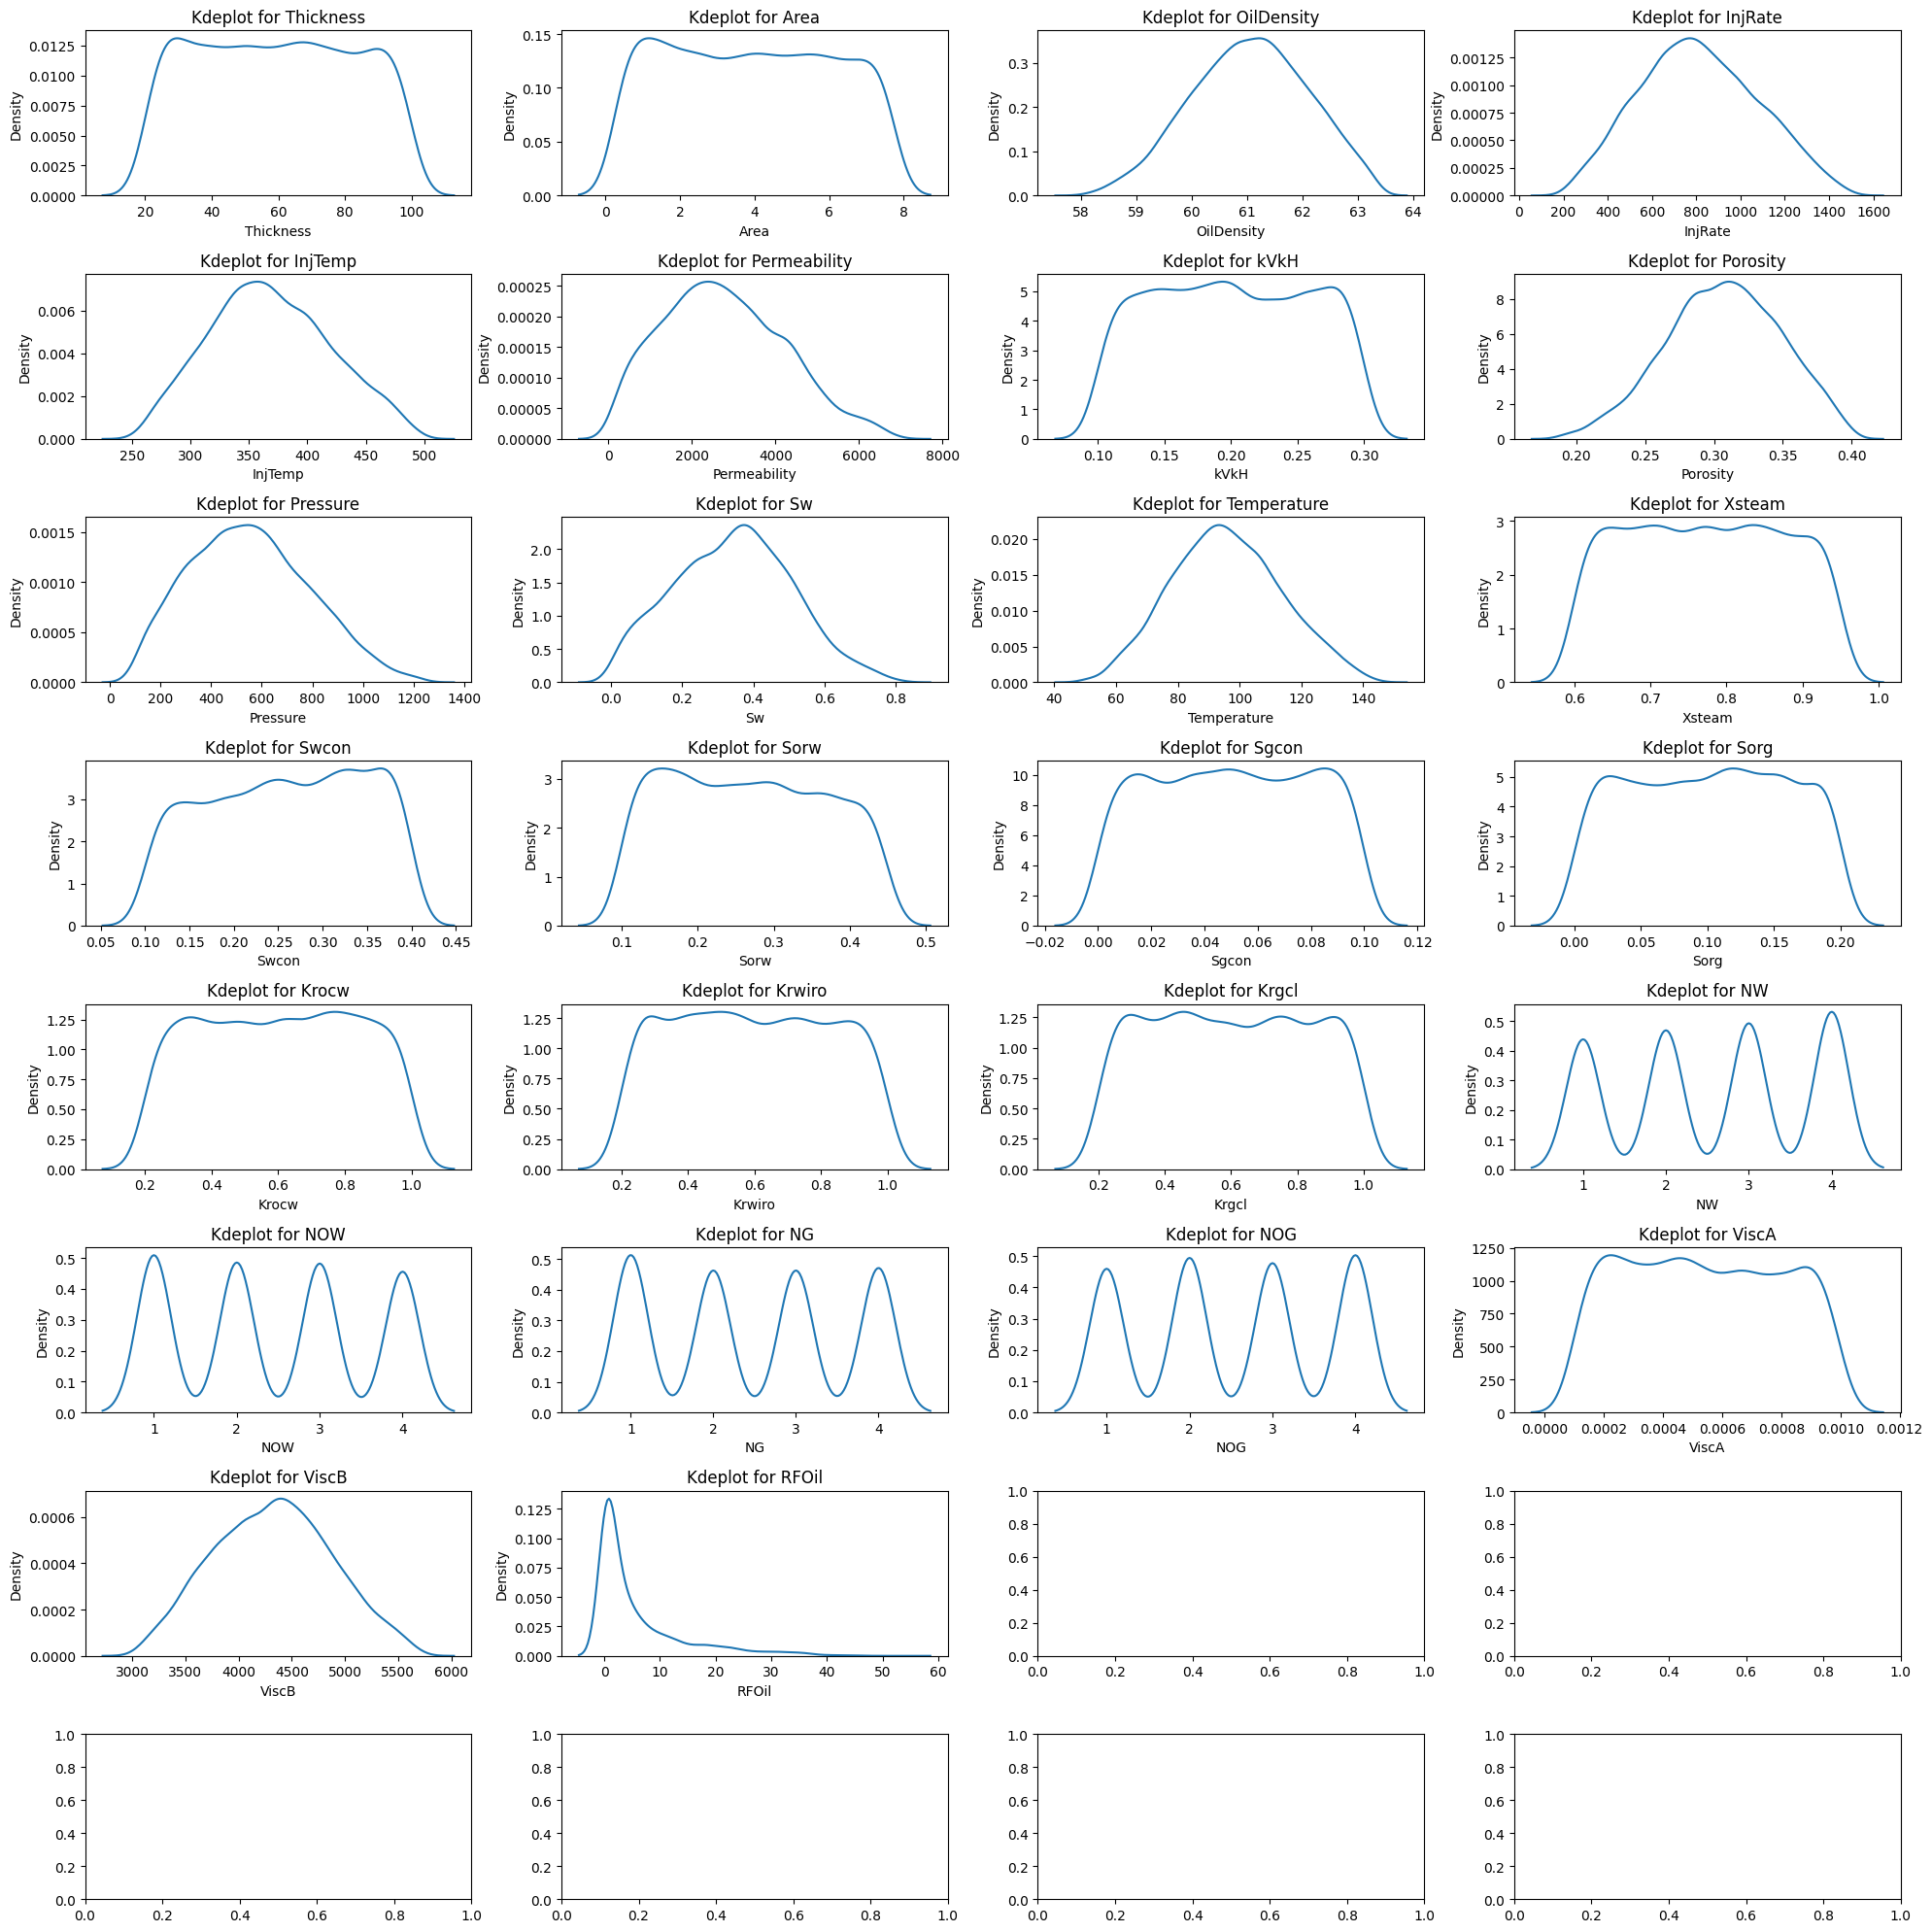

In [35]:
# Re-check distribution before scaling
fig, ax = plt.subplots(nrows=8, ncols=4, figsize=(20, 20))
ax = ax.flatten()

for i, col in enumerate(X_train.columns) :
    sns.kdeplot(data=X_train, x=col, ax=ax[i])
    ax[i].set_title(f'Kdeplot for {col}')

plt.tight_layout()
plt.show()

Based on the distribution above :

- **For uniform distributions:**

    - Normalization is generally a good choice as it preserves the uniform nature of the distribution while scaling it to a fixed range.


- **For multi-modal distributions:**

    Using standardization for feature scaling when the distribution is multi-modal may not be ideal. Here's a brief explanation why:

    1. Standardization assumes a normal distribution: It transforms features to have a mean of 0 and a standard deviation of 1, which works well for normally distributed data.

    2. Multi-modal distributions: These have multiple peaks, indicating distinct subgroups within the data. Standardization can obscure these important characteristics.

    3. Potential issues:
    - Loss of information about subgroups
    - Misrepresentation of the data's structure
    - Reduced effectiveness of algorithms that rely on distance measures

    Alternative approaches:

    1. Robust scaling: Using median and interquartile range instead of mean and standard deviation.
    2. Normalization: Scaling features to a fixed range (e.g., 0 to 1).
    3. Separate scaling: Treating each mode as a separate group and scaling them individually.
    4. Non-linear transformations: Applying methods like log transformation or Box-Cox to address non-normality.

- **For right-skewed distributions :**

    The goal is to make the distribution more symmetric and closer to normal. Here are some common transformations for right-skewed data:

    - Logarithmic transformation:

        - Most common for right-skewed data
        - log(x) or log(x + 1) if there are zeros in the data
        - Effective for data with a wide range of values


    - Square root transformation:

        - sqrt(x)
        - Less drastic than log transformation
        - Useful for count data or when log is too extreme

- **Exploring advanced techniques like:**

    - Quantile transformation: This can help in spreading out the most frequent values.

    - Power transforms (e.g., Box-Cox or Yeo-Johnson): These can help in making the distribution more Gaussian-like.

--------------------------------------------------------------------------------------

**Reminder About Choosing Scaling Methods**

If the issue is primarily with the range of values rather than the shape of the distributions, you can use scaling methods to bring all features to a similar scale without altering their distributions. Here are some common scaling methods you can consider:

1. **Min-Max Scaling (Normalization)**:
   - Scales the data to a fixed range, usually between 0 and 1.
   - Formula: \( X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} \)
   - Use when you know the minimum and maximum values for your features or when you want to bound the data within a specific range.

2. **Standard Scaling (Standardization)**:
   - Scales the data so that it has a mean of 0 and a standard deviation of 1.
   - Formula: \( X_{\text{scaled}} = \frac{X - \mu}{\sigma} \)
   - Use when the features are normally distributed or when you're using models that assume zero-centered data.

3. **Robust Scaling**:
   - Scales the data similarly to standard scaling but uses the median and the interquartile range (IQR) instead of the mean and standard deviation.
   - Formula: \( X_{\text{scaled}} = \frac{X - \text{median}(X)}{\text{IQR}(X)} \)
   - Use when the data contains outliers or when the distribution is not normal.

4. **Max Abs Scaler**:
   - Scales each feature to its maximum absolute value.
   - Formula: \( X_{\text{scaled}} = \frac{X}{\max(|X|)} \)
   - Use when the features are sparse or when you want to preserve sparsity.

5. **Power Transformer (Yeo-Johnson or Box-Cox)**:
   - Applies a power transformation to make the data more Gaussian-like.
   - Use when the data is skewed or when you need to stabilize variance.

For your case where the overall feature distributions are near normal but the ranges vary significantly, Min-Max Scaling or Standard Scaling might be appropriate. If you're concerned about outliers, Robust Scaling could be a better choice. It's often a good idea to try different scaling methods and see which one works best for your specific dataset and model.

In [36]:
X_train

Thickness  Area  OilDensity     InjRate    InjTemp  Permeability  \
869   98.519524   2.5   60.546506   705.14677  390.78524      745.9061   
5663  99.581301   6.5   60.739294   578.25319  353.29440     1253.3472   
400   66.173645   3.5   59.345538  1186.09650  303.14011     1928.5445   
4489  20.682619   7.0   59.294044   918.94135  336.09612     1839.9174   
2448  77.305500   2.0   61.534583  1219.74680  353.71044     4738.6084   
...         ...   ...         ...         ...        ...           ...   
3865  99.483357   0.5   60.539213   550.89627  475.14550     4005.2160   
5326  45.874658   4.5   59.570356   766.27371  347.16607     4637.1487   
5365  79.232997   1.5   62.409716   971.05860  363.99131     2929.7574   
5537  89.236033   7.0   61.368142   900.62354  341.21136     2840.8814   
892   31.741970   5.5   60.849125   736.94061  330.84839      509.2537   

          kVkH  Porosity    Pressure        Sw  Temperature    Xsteam  \
869   0.288524  0.334087   588.84461  0.239382    90.323984  0.915734   
5663  0.202918  0.272173   404.55680  0.313525    99.807022  0.830169   
400   0.187810  0.324277  1188.89520  0.526461    91.785054  0.890959   
4489  0.253079  0.211505   526.59156  0.377784   109.278740  0.687576   
2448  0.257560  0.307156   363.88121  0.256414    64.107641  0.728294   
...        ...       ...         ...       ...          ...       ...   
3865  0.216516  0.283749   411.78590  0.385591    71.403157  0.782500   
5326  0.136980  0.328791   653.03603  0.597938   121.109530  0.829123   
5365  0.130742  0.245739  1010.32150  0.552846    64.956420  0.904228   
5537  0.129293  0.212382   917.35668  0.441197   114.054360  0.784011   
892   0.277977  0.318063   931.41446  0.315620   101.394670  0.828359   

         Swcon      Sorw     Sgcon      Sorg     Krocw    Krwiro     Krgcl  \
869   0.329449  0.173490  0.051522  0.136776  0.886892  0.407584  0.888616   
5663  0.194242  0.290843  0.088748  0.132140  0.722248  0.320051  0.470144   
400   0.239227  0.134937  0.005613  0.188249  0.668576  0.227218  0.623674   
4489  0.142044  0.315688  0.009934  0.063359  0.677293  0.845233  0.996345   
2448  0.264031  0.346116  0.051264  0.197843  0.419959  0.495675  0.782310   
...        ...       ...       ...       ...       ...       ...       ...   
3865  0.244893  0.218704  0.086745  0.041506  0.571261  0.369791  0.268263   
5326  0.364825  0.153989  0.098829  0.116397  0.574742  0.584552  0.569255   
5365  0.151098  0.364742  0.010160  0.174426  0.320990  0.572415  0.429342   
5537  0.325291  0.391965  0.010579  0.094544  0.692810  0.293847  0.617037   
892   0.240197  0.177819  0.060316  0.112370  0.205105  0.202077  0.373730   

      NW  NOW  NG  NOG     ViscA      ViscB      RFOil  
869    3    4   3    1  0.000558  4811.1571   0.433549  
5663   1    1   3    3  0.000187  3481.5204   8.700425  
400    2    3   1    2  0.000226  4467.8610   2.170598  
4489   3    2   4    1  0.000153  4013.0550   3.787662  
2448   1    1   4    2  0.000966  4269.2936  10.392565  
...   ..  ...  ..  ...       ...        ...        ...  
3865   4    2   3    3  0.000588  4169.0861  12.271493  
5326   4    4   4    1  0.000444  3774.1869   6.023952  
5365   3    2   4    4  0.000580  3816.4542   0.091657  
5537   1    2   4    4  0.000857  3827.0160   0.198428  
892    2    3   2    4  0.000345  4795.1296   0.399328  

[4630 rows x 26 columns]

In [37]:
# Apply feature scalling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

ms = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()

apply_normalization_columns = ['Thickness', 'Area', 'kVkH', 'Xsteam', 'Swcon', 'Sorw', 'Sgcon', 'Sorg',
                               'Krocw', 'Krwiro', 'Krgcl', 'NW', 'NOW', 'NG', 'NOG', 'ViscA']

apply_standardization_columns = ['OilDensity', 'InjRate', 'InjTemp', 'Permeability',
                                 'Porosity', 'Pressure', 'Sw', 'Temperature', 'ViscB']

# # Apply min-max scaling
# X_train[apply_normalization_columns] = ms.fit_transform(X_train[apply_normalization_columns])
# X_test[apply_normalization_columns] = ms.transform(X_test[apply_normalization_columns])

# # Apply standardization
# X_train[apply_standardization_columns] = ss.fit_transform(X_train[apply_standardization_columns])
# X_test[apply_standardization_columns] = ss.transform(X_test[apply_standardization_columns])

# Apply log transformation to RFOil
X_train["RFOil"] = np.log(X_train["RFOil"])
X_test["RFOil"] = np.log(X_test["RFOil"])

# Apply standardization to all columns
X_train[X_train.columns] = ss.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = ss.transform(X_test[X_test.columns])

# # Apply robust scalling to all columns
# X_train[X_train.columns] = rs.fit_transform(X_train[X_train.columns])
# X_test[X_test.columns] = rs.transform(X_test[X_test.columns])

In [38]:
# Statistical summary of mean and standard deviation after scale with standardization
X_train.describe().transpose()[['mean', 'std']]

mean       std
Thickness     3.713852e-16  1.000108
Area         -4.412117e-17  1.000108
OilDensity    3.403853e-15  1.000108
InjRate       7.443050e-17  1.000108
InjTemp      -7.335625e-16  1.000108
Permeability -1.450244e-16  1.000108
kVkH         -3.683159e-16  1.000108
Porosity     -9.591560e-17  1.000108
Pressure     -2.593558e-16  1.000108
Sw           -4.603949e-17  1.000108
Temperature   6.445528e-17  1.000108
Xsteam       -1.120294e-15  1.000108
Swcon        -2.186876e-16  1.000108
Sorw          5.524738e-17  1.000108
Sgcon         1.408041e-16  1.000108
Sorg         -1.104948e-16  1.000108
Krocw        -3.529694e-16  1.000108
Krwiro       -2.509152e-16  1.000108
Krgcl        -1.350492e-16  1.000108
NW           -1.304452e-16  1.000108
NOW          -7.673248e-18  1.000108
NG           -1.688114e-16  1.000108
NOG          -1.626729e-16  1.000108
ViscA         1.688114e-17  1.000108
ViscB         1.015938e-15  1.000108
RFOil        -7.673248e-18  1.000108

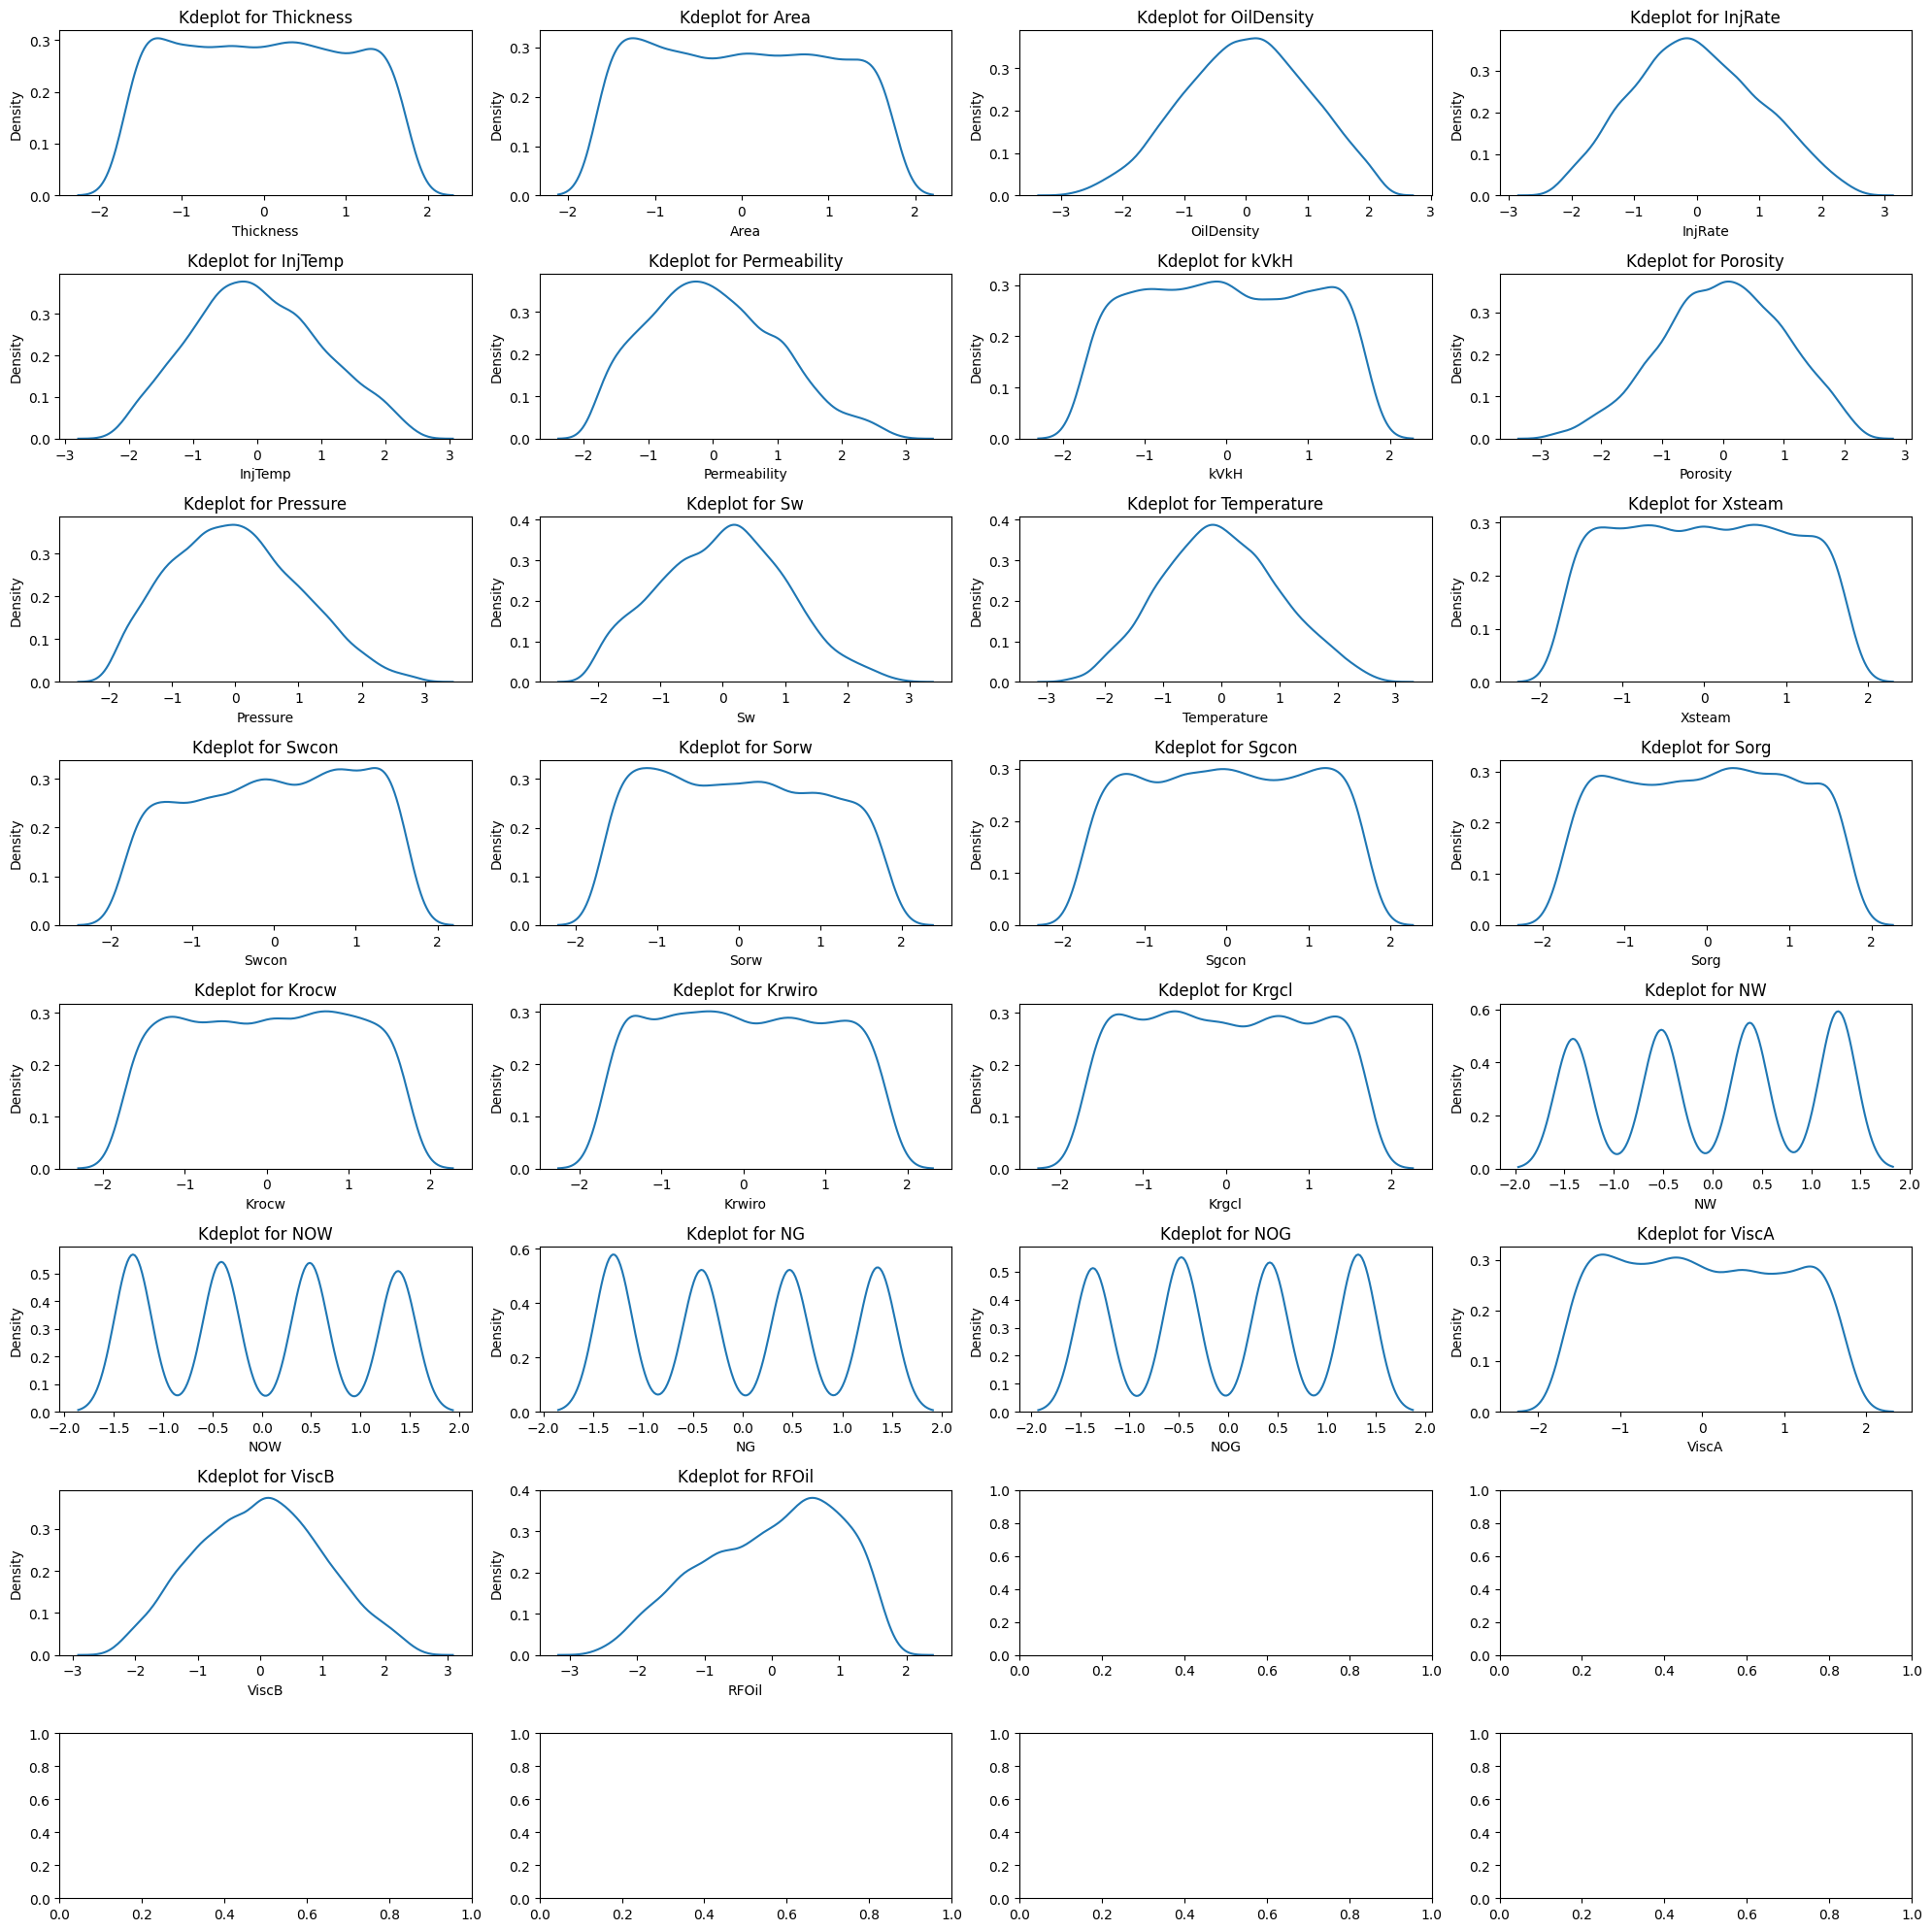

In [39]:
# Checking distribution after scaling
fig, ax = plt.subplots(nrows=8, ncols=4, figsize=(20, 20))
ax = ax.flatten()

for i, col in enumerate(X_train.columns) :
    sns.kdeplot(data=X_train, x=col, ax=ax[i])
    ax[i].set_title(f'Kdeplot for {col}')

plt.tight_layout()
plt.show()

In [40]:
X_train

Thickness      Area  OilDensity   InjRate   InjTemp  Permeability  \
869    1.686778 -0.642933   -0.487328 -0.406640  0.434826     -1.394240   
5663   1.732634  1.188791   -0.302310 -0.884376 -0.294729     -1.043761   
400    0.289814 -0.185002   -1.639892  1.404064 -1.270709     -0.577417   
4489  -1.674866  1.417756   -1.689310  0.398265 -0.629400     -0.638629   
2448   0.770580 -0.871899    0.460926  1.530753 -0.286633      1.363435   
...         ...       ...         ...       ...       ...           ...   
3865   1.728404 -1.558795   -0.494327 -0.987371  2.076439      0.856896   
5326  -0.586865  0.272929   -1.424135 -0.176506 -0.413984      1.293359   
5365   0.853825 -1.100864    1.300787  0.594478 -0.086572      0.114100   
5537   1.285840  1.417756    0.301193  0.329301 -0.529860      0.052715   
892   -1.197232  0.730860   -0.196905 -0.286941 -0.731519     -1.557691   

          kVkH  Porosity  Pressure        Sw  Temperature    Xsteam     Swcon  \
869   1.527818  0.649237  0.151754 -0.636153    -0.313673  1.410950  0.816384   
5663  0.041150 -0.844209 -0.634520 -0.184048     0.223502  0.565231 -0.751287   
400  -0.221219  0.412623  2.711900  1.114374    -0.230910  1.166074 -0.229708   
4489  0.912261 -2.307600 -0.113852  0.207784     0.760036 -0.844143 -1.356505   
2448  0.990082 -0.000356 -0.808064 -0.532300    -1.798722 -0.441696  0.057885   
...        ...       ...       ...       ...          ...       ...       ...   
3865  0.277301 -0.564975 -0.603676  0.255385    -1.385461  0.094080 -0.164013   
5326 -1.103961  0.521501  0.425630  1.550221     1.430202  0.554898  1.226554   
5365 -1.212278 -1.481832  1.950006  1.275264    -1.750642  1.297224 -1.251531   
5537 -1.237451 -2.286440  1.553367  0.594455     1.030555  0.109011  0.768175   
892   1.344656  0.262713  1.613345 -0.171276     0.313436  0.547340 -0.218454   

          Sorw     Sgcon      Sorg     Krocw    Krwiro     Krgcl        NW  \
869  -0.925462  0.042222  0.615556  1.229460 -0.808348  1.230379  0.377365   
5663  0.242770  1.329813  0.535728  0.515923 -1.187190 -0.558283 -1.412798   
400  -1.309245 -1.545672  1.501906  0.283321 -1.588967  0.097947 -0.517717   
4489  0.490095 -1.396213 -0.648680  0.321101  1.085788  1.690840  0.377365   
2448  0.792999  0.033325  1.667117 -0.794134 -0.427091  0.775999 -1.412798   
...        ...       ...       ...       ...       ...       ...       ...   
3865 -0.475365  1.260547 -1.024980 -0.138419 -0.971915 -1.421173  1.272446   
5326 -1.119585  1.678505  0.264630 -0.123337 -0.042435 -0.134655  1.272446   
5365  0.978423 -1.388400  1.263880 -1.223043 -0.094962 -0.732681  0.377365   
5537  1.249421 -1.373924 -0.111674  0.388347 -1.300597  0.069578 -1.412798   
892  -0.882367  0.346399  0.195289 -1.725267 -1.697775 -0.970382 -0.517717   

           NOW        NG       NOG     ViscA     ViscB     RFOil  
869   1.381211  0.471228 -1.370996  0.072016  0.880632 -0.696655  
5663 -1.305391  0.471228  0.421890 -1.354511 -1.534614  0.877452  
400   0.485677 -1.296831 -0.474553 -1.206678  0.257045  0.148758  
4489 -0.409857  1.355257 -1.370996 -1.485212 -0.569097  0.440970  
2448 -1.305391  1.355257 -0.474553  1.643163 -0.103647  0.970729  
...        ...       ...       ...       ...       ...       ...  
3865 -0.409857  0.471228  0.421890  0.188989 -0.285671  1.057954  
5326  1.381211  1.355257 -1.370996 -0.366884 -1.002994  0.684500  
5365 -0.409857  1.355257  1.318332  0.156866 -0.926216 -1.512253  
5537 -0.409857  1.355257  1.318332  1.222711 -0.907031 -1.106872  
892   0.485677 -0.412802  1.318332 -0.746673  0.851519 -0.739809  

[4630 rows x 26 columns]

In [41]:
X_test

Thickness      Area  OilDensity   InjRate   InjTemp  Permeability  \
5085  -0.306807  0.501894   -1.478221  1.102475 -0.412818     -1.521097   
4856  -0.197918 -1.329830    0.172983  1.442723  0.649295     -0.768468   
1084  -1.546355  1.646722    0.830824 -0.362116 -0.058808     -0.017254   
1744   1.488527 -1.558795   -0.858014 -0.247170 -0.280094      0.371536   
162    1.060418  0.730860   -0.244180  0.465878 -0.465670     -1.613478   
...         ...       ...         ...       ...       ...           ...   
4796   0.885690 -1.329830   -2.120686  0.533781 -0.725361      0.831095   
5837   1.574793  0.730860    1.138067 -0.839627 -0.628174     -0.184801   
5455  -0.081991  0.272929   -0.857384  0.658583 -0.376322      1.252136   
209   -1.592009  1.188791    0.772698 -1.330308 -1.917391      2.417013   
348   -1.291757 -1.100864   -0.162670  0.106661  1.441163     -0.500554   

          kVkH  Porosity  Pressure        Sw  Temperature    Xsteam     Swcon  \
5085  1.280200  0.995279 -1.450480  0.137053     0.093354 -0.820829  0.282924   
4856 -0.711667  1.717752 -0.612729  1.074247    -0.264760  0.039302  1.617433   
1084 -1.528253 -0.774012 -0.827864  0.660095    -0.310807 -0.299653  0.615103   
1744  0.283953  1.602463 -0.505937  1.038403    -0.372054  0.350991 -0.736832   
162   0.343415  0.275382 -0.947242 -1.274824    -0.701054 -1.439205  0.820076   
...        ...       ...       ...       ...          ...       ...       ...   
4796 -0.531118 -0.744188  1.831324  1.236086     0.158564 -0.110782  1.576929   
5837  0.941379  1.587353  0.262699  0.306578     0.199029 -1.574155 -1.318945   
5455  0.322604 -0.406454 -0.123233 -0.286866    -0.898005 -1.170206 -0.496744   
209   0.869302 -1.177016 -0.021826 -0.783010     1.120111  0.476350  0.398914   
348  -0.028354  0.558485 -1.006756 -0.922677    -1.229149  0.782215  0.863600   

          Sorw     Sgcon      Sorg     Krocw    Krwiro     Krgcl        NW  \
5085 -0.385616  0.119159  0.841353 -0.210909 -0.169491 -0.883552 -0.517717   
4856 -1.381578 -0.748181 -0.209616 -1.520461  1.410376  0.623767 -1.412798   
1084 -0.878380 -0.500824 -1.715993 -0.647632 -1.044335 -0.967019 -0.517717   
1744 -0.630848  1.184847 -0.247871 -0.190636 -0.914477 -1.654084 -1.412798   
162   0.267243 -0.312140 -1.569139  0.427316  0.996864  0.655078  0.377365   
...        ...       ...       ...       ...       ...       ...       ...   
4796  1.425968  0.366236 -1.320530  1.673977  1.504130 -0.995050  1.272446   
5837 -0.252554 -0.155513 -1.724206  0.478150 -1.183309  1.084693 -0.517717   
5455  1.444542 -1.561381  0.759695  0.831311  0.492948  0.279720  0.377365   
209  -0.496437  1.520637  0.035696  1.438755 -0.650806 -1.388775  0.377365   
348  -0.572484  1.637344 -1.437042 -0.177434  1.711910  1.618160  0.377365   

           NOW        NG       NOG     ViscA     ViscB     RFOil  
5085  0.485677 -1.296831 -0.474553  1.352497  0.569302 -0.849467  
4856 -0.409857  0.471228 -1.370996  0.416030 -0.021686 -0.902640  
1084  1.381211  0.471228 -0.474553  0.317767  0.345642 -1.096197  
1744 -1.305391  1.355257  1.318332 -0.885273 -2.170444  0.797335  
162  -0.409857  1.355257  0.421890 -0.954866 -0.817120  0.617529  
...        ...       ...       ...       ...       ...       ...  
4796 -0.409857  1.355257  0.421890 -0.256329  0.540658  0.302132  
5837 -0.409857  1.355257  0.421890 -0.770283  0.634481 -0.811145  
5455 -1.305391 -0.412802 -1.370996  0.708334 -1.781472  1.228167  
209   1.381211 -0.412802 -1.370996 -0.639840  1.977210  0.509696  
348  -0.409857  0.471228  1.318332 -0.752463  0.654832  0.235979  

[1158 rows x 26 columns]

In [42]:
y_train

869     19
5663    15
400     11
4489    18
2448    20
        ..
3865    26
5326    26
5365    11
5537    27
892     29
Name: InjectionPeriod, Length: 4630, dtype: int64

In [43]:
y_test

5085    25
4856    24
1084     7
1744    10
162     15
        ..
4796    11
5837    28
5455    30
209     23
348      8
Name: InjectionPeriod, Length: 1158, dtype: int64

#### Deep Learning Modified

Epoch 1/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 20.0357 - mean_absolute_error: 18.7084 - r2_score: -7.5004 - root_mean_squared_error: 19.9538 - val_loss: 19.7439 - val_mean_absolute_error: 18.9259 - val_r2_score: -7.0376 - val_root_mean_squared_error: 20.2267 - learning_rate: 0.0010
Epoch 2/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.0315 - mean_absolute_error: 18.3284 - r2_score: -7.1908 - root_mean_squared_error: 19.6246 - val_loss: 19.4376 - val_mean_absolute_error: 19.0189 - val_r2_score: -7.1079 - val_root_mean_squared_error: 20.3149 - learning_rate: 0.0010
Epoch 3/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.5664 - mean_absolute_error: 18.2150 - r2_score: -7.1468 - root_mean_squared_error: 19.5037 - val_loss: 19.2200 - val_mean_absolute_error: 19.0413 - val_r2_score: -7.1239 - val_root_mean_squared_error: 20.3350 - learning_rate: 0.0010
Epoch 4/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.1574 - mean_absolute_error: 18.0225 - r2_score: 

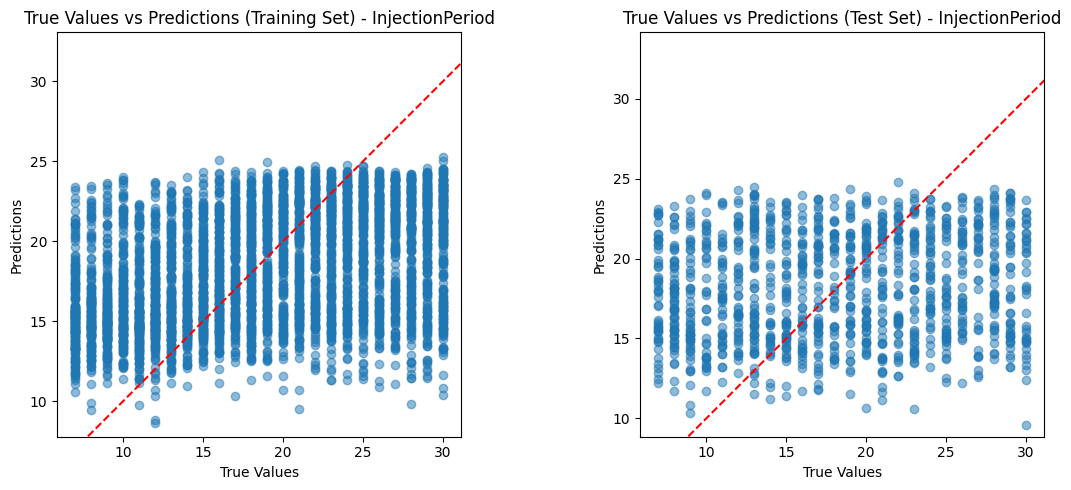

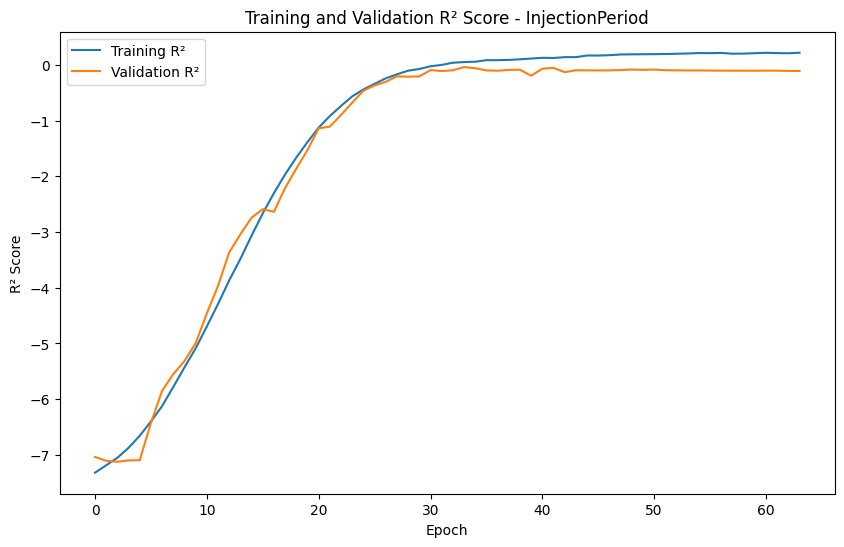

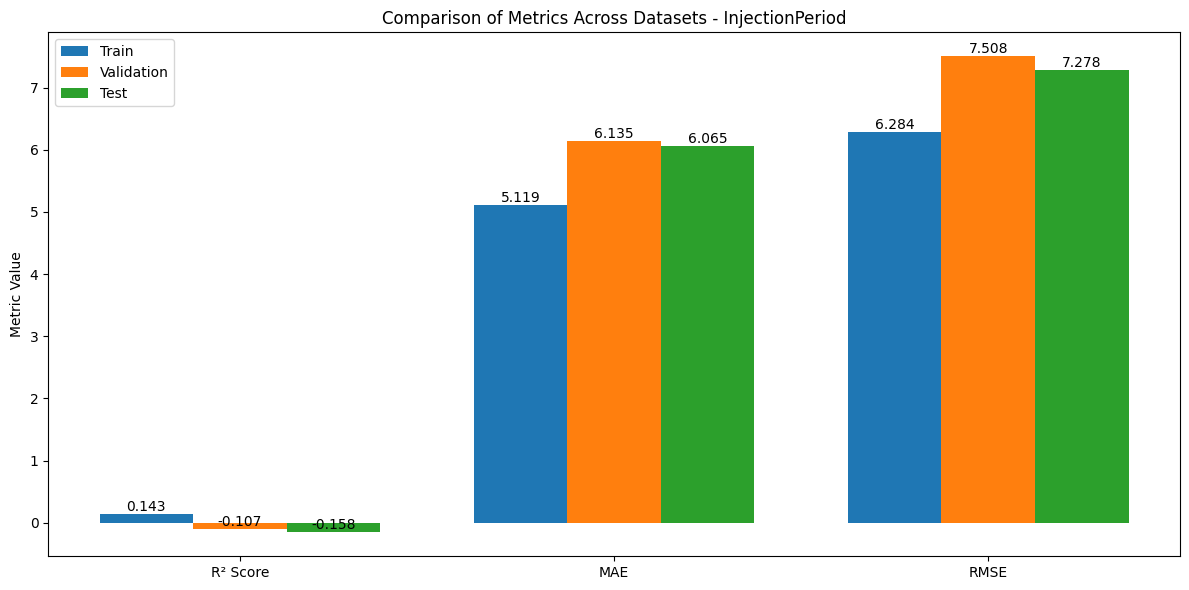

In [44]:
# Trial using neural network (architecture modified)

# Custom R² metric
class R2Score(tf.keras.metrics.Metric):
    def __init__(self, name='r2_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.sum_squared_residuals = self.add_weight(name='sum_squared_residuals', initializer='zeros')
        self.sum_squared_total = self.add_weight(name='sum_squared_total', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.cast(y_pred, tf.float32)
        y_mean = tf.reduce_mean(y_true)
        sum_squared_residuals = tf.reduce_sum(tf.square(y_true - y_pred))
        sum_squared_total = tf.reduce_sum(tf.square(y_true - y_mean))
        self.sum_squared_residuals.assign_add(sum_squared_residuals)
        self.sum_squared_total.assign_add(sum_squared_total)

    def result(self):
        return 1 - self.sum_squared_residuals / (self.sum_squared_total + tf.keras.backend.epsilon())

    def reset_state(self):
        self.sum_squared_residuals.assign(0)
        self.sum_squared_total.assign(0)

# Convert data to float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Step 1: Define the model architecture with L2 regularization
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(
            units=512,  # Increased number of units
            activation='relu',
            input_shape=input_shape,
            kernel_initializer='he_normal',  # Changed initializer
            bias_initializer='zeros',
            kernel_regularizer=keras.regularizers.l2(0.001),
            activity_regularizer=None,
            kernel_constraint=None
        ),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),  # Increased dropout rate

        keras.layers.Dense(
            units=256,  # Increased number of units
            activation='relu',
            kernel_initializer='he_normal',  # Changed initializer
            bias_initializer='zeros',
            kernel_regularizer=keras.regularizers.l2(0.001),
            activity_regularizer=None,
            kernel_constraint=None
        ),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),  # Increased dropout rate

        keras.layers.Dense(
            units=128,  # Increased number of units
            activation='relu',
            kernel_initializer='he_normal',  # Changed initializer
            bias_initializer='zeros',
            kernel_regularizer=keras.regularizers.l2(0.001),
            activity_regularizer=None,
            kernel_constraint=None
        ),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.4),  # Slightly increased dropout rate

        keras.layers.Dense(
            units=64,  # Decreased number of units
            activation='relu',
            kernel_initializer='he_normal',  # Changed initializer
            bias_initializer='zeros',
            kernel_regularizer=keras.regularizers.l2(0.001),
            activity_regularizer=None,
            kernel_constraint=None
        ),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(
            units=32,  # Decreased number of units
            activation='relu',
            kernel_initializer='he_normal',  # Changed initializer
            bias_initializer='zeros',
            kernel_regularizer=keras.regularizers.l2(0.001),
            activity_regularizer=None,
            kernel_constraint=None
        ),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(
            units=16,  # Decreased number of units
            activation='relu',
            kernel_initializer='he_normal',  # Changed initializer
            bias_initializer='zeros',
            kernel_regularizer=keras.regularizers.l2(0.001),
            activity_regularizer=None,
            kernel_constraint=None
        ),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(
            units=8,  # Decreased number of units
            activation='relu',
            kernel_initializer='he_normal',  # Changed initializer
            bias_initializer='zeros',
            kernel_regularizer=keras.regularizers.l2(0.001),
            activity_regularizer=None,
            kernel_constraint=None
        ),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(1)  # Output layer
    ])
    return model


model = build_model((X_train.shape[1],))

# Step 2: Compile the model with Huber loss
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.Huber(),
              metrics=[R2Score(), tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.RootMeanSquaredError()])

# Step 3: Define callbacks for early stopping and learning rate reduction
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_r2_score', 
    mode='max', 
    patience=30, 
    restore_best_weights=True
)
lr_reducer = keras.callbacks.ReduceLROnPlateau(
    monitor='val_r2_score', 
    mode='max', 
    factor=0.2, 
    patience=10,
    min_lr=1e-6
)

# Step 4: Train the model
history = model.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=128,
    validation_split=0.05,
    callbacks=[early_stopping, lr_reducer],
    verbose=1
)

# Step 6: Evaluate the model on the test set and training set
train_loss, train_r2, train_mae, train_rmse = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_r2, test_mae, test_rmse = model.evaluate(X_test, y_test, verbose=0)

print("Training Set Metrics:")
print(f"Train Loss: {train_loss:.4f}")
print(f"Train R² Score: {train_r2:.4f}")
print(f"Train MAE: {train_mae:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")

print("\nTest Set Metrics:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

# Step 7: Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Step 8: Visualize the results
plt.figure(figsize=(12, 5))

# Training set plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.plot([-100, 100], [-100, 100], color='red', linestyle='--')
plt.title('True Values vs Predictions (Training Set) - InjectionPeriod')

# Test set plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.plot([-100, 100], [-100, 100], color='red', linestyle='--')
plt.title('True Values vs Predictions (Test Set) - InjectionPeriod')

plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['r2_score'], label='Training R²')
plt.plot(history.history['val_r2_score'], label='Validation R²')
plt.title('Training and Validation R² Score - InjectionPeriod')
plt.xlabel('Epoch')
plt.ylabel('R² Score')
plt.legend()
plt.show()

# Add a new plot to compare final metrics
plt.figure(figsize=(12, 6))
metrics = ['R² Score', 'MAE', 'RMSE']
train_metrics = [train_r2, train_mae, train_rmse]
val_metrics = [history.history['val_r2_score'][-1], history.history['val_mean_absolute_error'][-1], history.history['val_root_mean_squared_error'][-1]]
test_metrics = [test_r2, test_mae, test_rmse]

x = range(len(metrics))
width = 0.25

# Function to make label on top of each individual bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', rotation=0)

train_bars = plt.bar([i - width for i in x], train_metrics, width, label='Train', align='center')
val_bars = plt.bar(x, val_metrics, width, label='Validation', align='center')
test_bars = plt.bar([i + width for i in x], test_metrics, width, label='Test', align='center')

autolabel(train_bars)
autolabel(val_bars)
autolabel(test_bars)

plt.ylabel('Metric Value')
plt.title('Comparison of Metrics Across Datasets - InjectionPeriod')
plt.xticks(x, metrics)
plt.legend()

# Adjust the plot to prevent clipping of tick-labels
plt.tight_layout()
plt.show()

Epoch 1/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 18.3529 - mean_absolute_error: 18.5403 - r2_score: -7.4628 - root_mean_squared_error: 19.7877 - val_loss: 18.3741 - val_mean_absolute_error: 18.6959 - val_r2_score: -6.8672 - val_root_mean_squared_error: 20.0110 - learning_rate: 0.0010
Epoch 2/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.9536 - mean_absolute_error: 18.3037 - r2_score: -7.1500 - root_mean_squared_error: 19.6017 - val_loss: 18.0637 - val_mean_absolute_error: 18.4795 - val_r2_score: -6.7091 - val_root_mean_squared_error: 19.8090 - learning_rate: 0.0010
Epoch 3/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.6486 - mean_absolute_error: 18.0777 - r2_score: -7.0113 - root_mean_squared_error: 19.3948 - val_loss: 17.7079 - val_mean_absolute_error: 18.1673 - val_r2_score: -6.4844 - val_root_mean_squared_error: 19.5182 - learning_rate: 0.0010
Epoch 4/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.1389 - mean_absolute_error: 17.6040 - r2_score: -

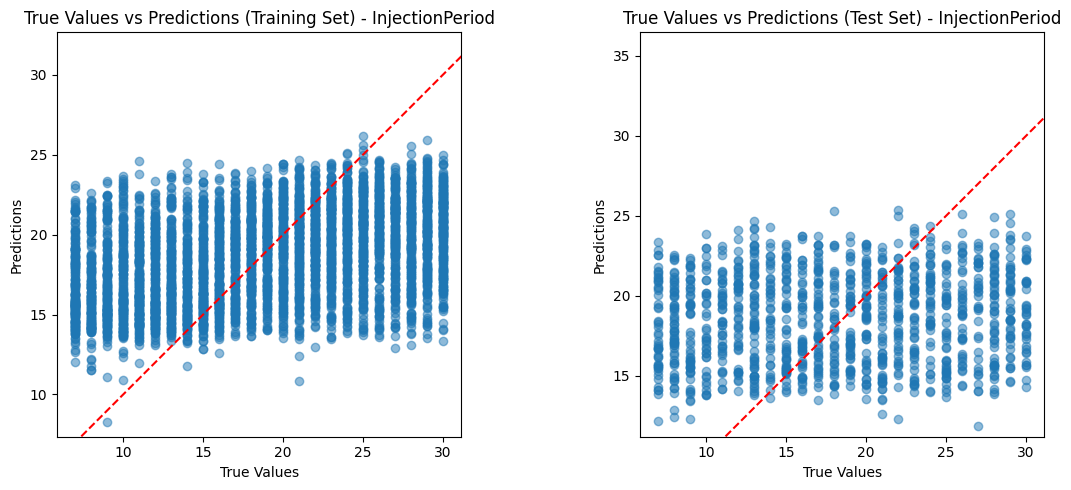

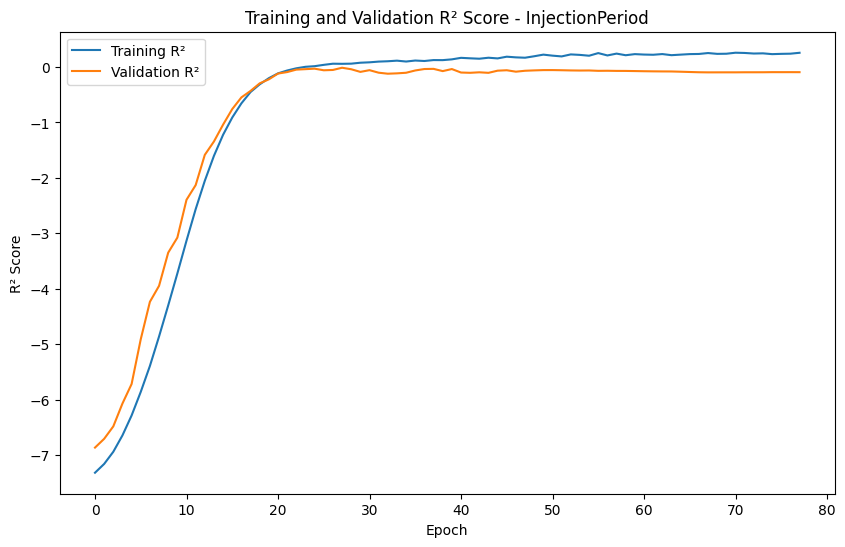

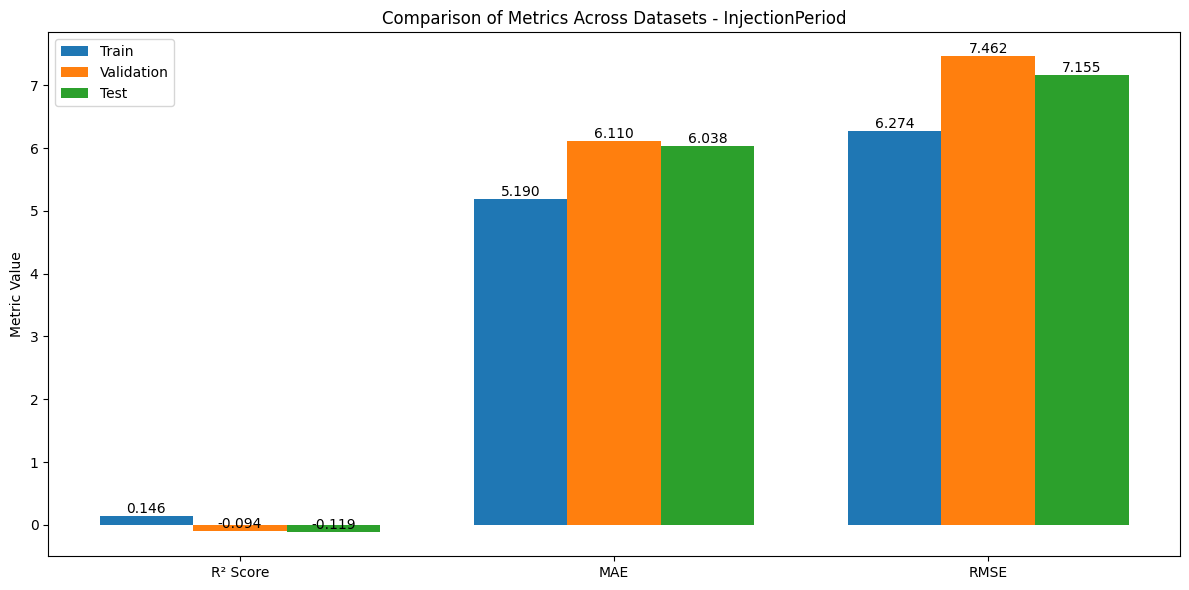

In [45]:
# Trial using neural network (architecture non-modified)

# Custom R² metric
class R2Score(tf.keras.metrics.Metric):
    def __init__(self, name='r2_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.sum_squared_residuals = self.add_weight(name='sum_squared_residuals', initializer='zeros')
        self.sum_squared_total = self.add_weight(name='sum_squared_total', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.cast(y_pred, tf.float32)
        y_mean = tf.reduce_mean(y_true)
        sum_squared_residuals = tf.reduce_sum(tf.square(y_true - y_pred))
        sum_squared_total = tf.reduce_sum(tf.square(y_true - y_mean))
        self.sum_squared_residuals.assign_add(sum_squared_residuals)
        self.sum_squared_total.assign_add(sum_squared_total)

    def result(self):
        return 1 - self.sum_squared_residuals / (self.sum_squared_total + tf.keras.backend.epsilon())

    def reset_state(self):
        self.sum_squared_residuals.assign(0)
        self.sum_squared_total.assign(0)

# Convert data to float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Step 1: Define the model architecture with L2 regularization
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=input_shape, kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.4),
        keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.4),
        keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(1)
    ])
    return model

model = build_model((X_train.shape[1],))

# Step 2: Compile the model with Huber loss
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.Huber(),
              metrics=[R2Score(), tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.RootMeanSquaredError()])

# Step 3: Define callbacks for early stopping and learning rate reduction
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_r2_score', 
    mode='max', 
    patience=50, 
    restore_best_weights=True
)
lr_reducer = keras.callbacks.ReduceLROnPlateau(
    monitor='val_r2_score', 
    mode='max', 
    factor=0.1, 
    patience=20,
    min_lr=1e-6
)

# Step 4: Train the model
history = model.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=128,
    validation_split=0.05,
    callbacks=[early_stopping, lr_reducer],
    verbose=1
)

# Step 6: Evaluate the model on the test set and training set
train_loss, train_r2, train_mae, train_rmse = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_r2, test_mae, test_rmse = model.evaluate(X_test, y_test, verbose=0)

print("Training Set Metrics:")
print(f"Train Loss: {train_loss:.4f}")
print(f"Train R² Score: {train_r2:.4f}")
print(f"Train MAE: {train_mae:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")

print("\nTest Set Metrics:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

# Step 7: Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Step 8: Visualize the results
plt.figure(figsize=(12, 5))

# Training set plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.plot([-100, 100], [-100, 100], color='red', linestyle='--')
plt.title('True Values vs Predictions (Training Set) - InjectionPeriod')

# Test set plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.plot([-100, 100], [-100, 100], color='red', linestyle='--')
plt.title('True Values vs Predictions (Test Set) - InjectionPeriod')

plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['r2_score'], label='Training R²')
plt.plot(history.history['val_r2_score'], label='Validation R²')
plt.title('Training and Validation R² Score - InjectionPeriod')
plt.xlabel('Epoch')
plt.ylabel('R² Score')
plt.legend()
plt.show()

# Add a new plot to compare final metrics
plt.figure(figsize=(12, 6))
metrics = ['R² Score', 'MAE', 'RMSE']
train_metrics = [train_r2, train_mae, train_rmse]
val_metrics = [history.history['val_r2_score'][-1], history.history['val_mean_absolute_error'][-1], history.history['val_root_mean_squared_error'][-1]]
test_metrics = [test_r2, test_mae, test_rmse]

x = range(len(metrics))
width = 0.25

# Function to make label on top of each individual bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', rotation=0)

train_bars = plt.bar([i - width for i in x], train_metrics, width, label='Train', align='center')
val_bars = plt.bar(x, val_metrics, width, label='Validation', align='center')
test_bars = plt.bar([i + width for i in x], test_metrics, width, label='Test', align='center')

autolabel(train_bars)
autolabel(val_bars)
autolabel(test_bars)

plt.ylabel('Metric Value')
plt.title('Comparison of Metrics Across Datasets - InjectionPeriod')
plt.xticks(x, metrics)
plt.legend()

# Adjust the plot to prevent clipping of tick-labels
plt.tight_layout()
plt.show()

The hyperparameters in the code I provided are a good starting point, but they're not necessarily optimized for best performance. Optimal hyperparameters can vary significantly depending on the specific dataset and problem. Here's my perspective on the current hyperparameters and potential areas for improvement:

1. Network architecture:
   - The current architecture (128-64-32-16-8 neurons) is reasonably deep and wide, but it might not be optimal for your specific problem.
   - You could experiment with different numbers of layers and neurons per layer.

2. Learning rate:
   - The current learning rate (0.001) is a common default, but it might not be ideal for your case.
   - You could try a learning rate scheduler or different initial learning rates.

3. Batch size:
   - The current batch size (32) is a common choice, but you might get better results with a different value.
   - Try values like 16, 64, or 128 to see if they improve performance.

4. Dropout rate:
   - The current dropout rate (0.3) is moderate. You could try different rates (e.g., 0.2, 0.4, 0.5) to see if they improve generalization.

5. Early stopping patience:
   - The current patience (20 epochs) might be too long or too short depending on your dataset size and complexity.

6. Learning rate reduction:
   - The current factor (0.5) and patience (5 epochs) for learning rate reduction could be adjusted.

7. Activation functions:
   - We're using ReLU activation, which is a good default, but you could experiment with others like LeakyReLU or ELU.

8. Optimizer:
   - We're using Adam, which is generally a good choice, but you could try others like RMSprop or SGD with momentum.

To find the best hyperparameters, you could:

1. Use random search or grid search with cross-validation to explore different combinations of hyperparameters.

2. Use more advanced hyperparameter optimization techniques like Bayesian optimization (e.g., using libraries like Optuna or Hyperopt).

3. Try automated machine learning (AutoML) tools that can search for optimal architectures and hyperparameters.

Here's an example of how you might set up a simple random search:

```python
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

def create_model(neurons1=128, neurons2=64, neurons3=32, dropout_rate=0.3, learning_rate=0.001):
    model = keras.Sequential([
        keras.layers.Dense(neurons1, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(neurons2, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(neurons3, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(1)
    ])
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[tf.keras.metrics.RSquare()])
    return model

model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=32, verbose=0)

param_dist = {
    'neurons1': [64, 128, 256],
    'neurons2': [32, 64, 128],
    'neurons3': [16, 32, 64],
    'dropout_rate': [0.2, 0.3, 0.4],
    'learning_rate': [0.0001, 0.001, 0.01],
    'batch_size': [16, 32, 64]
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=20, cv=3, scoring='r2')
random_search_results = random_search.fit(X_train_scaled, y_train)

print("Best parameters:", random_search_results.best_params_)
print("Best R² score:", random_search_results.best_score_)
```

This script will perform a random search over the specified hyperparameter space. You can adjust the ranges and add more hyperparameters as needed.

Remember, hyperparameter optimization can be computationally expensive, so you might need to run this on a powerful machine or cloud service if you have a large dataset or complex model.

# **STAGE 3 : MODELLING AND EVALUATION**

## Deep Learning Algorithm

#### Architecture Modified

Epoch 1/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 19.9557 - mean_absolute_error: 18.6360 - r2_score: -7.2597 - root_mean_squared_error: 19.9279 - val_loss: 19.3053 - val_mean_absolute_error: 18.4941 - val_r2_score: -6.7126 - val_root_mean_squared_error: 19.8135 - learning_rate: 0.0010
Epoch 2/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.8496 - mean_absolute_error: 18.1532 - r2_score: -7.1235 - root_mean_squared_error: 19.4999 - val_loss: 18.3347 - val_mean_absolute_error: 17.9221 - val_r2_score: -6.3131 - val_root_mean_squared_error: 19.2935 - learning_rate: 0.0010
Epoch 3/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.2777 - mean_absolute_error: 17.9320 - r2_score: -6.8776 - root_mean_squared_error: 19.2852 - val_loss: 17.5931 - val_mean_absolute_error: 17.4123 - val_r2_score: -5.9593 - val_root_mean_squared_error: 18.8210 - learning_rate: 0.0010
Epoch 4/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.6654 - mean_absolute_error: 17.5240 - r2_score: 

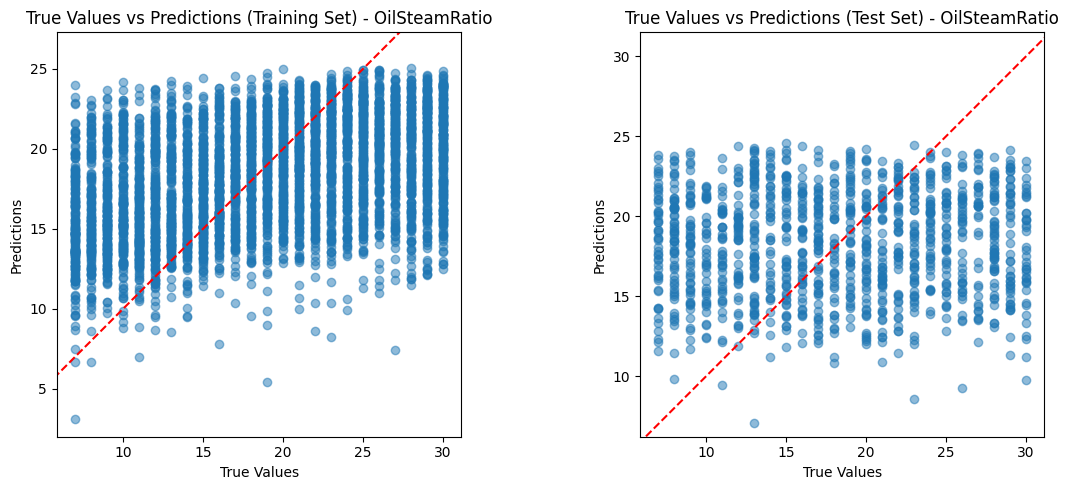

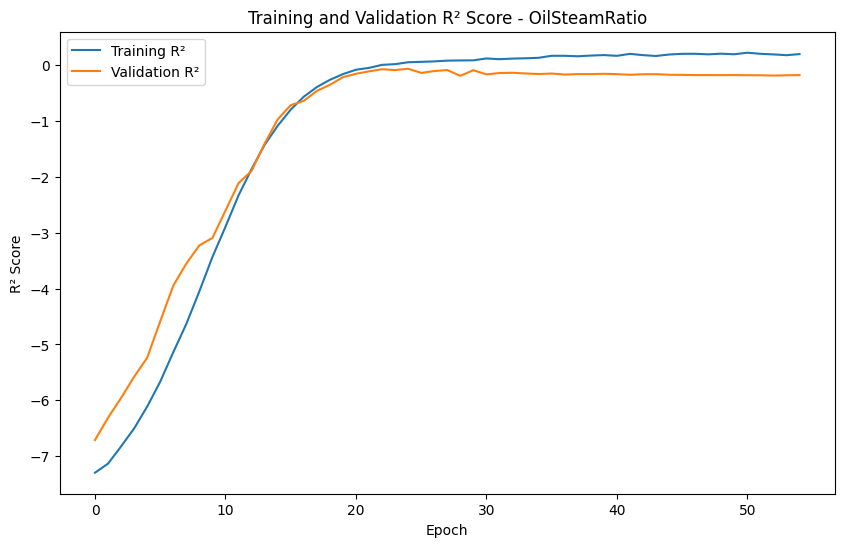

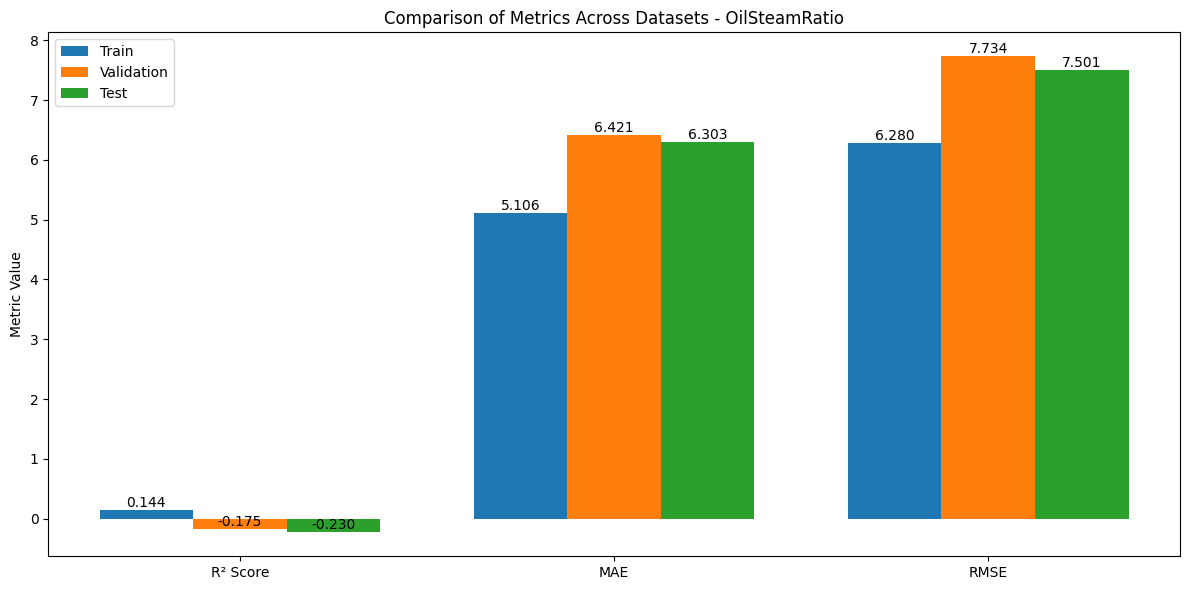

In [46]:
# Trial using neural network (architecture modified)

# Custom R² metric
class R2Score(tf.keras.metrics.Metric):
    def __init__(self, name='r2_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.sum_squared_residuals = self.add_weight(name='sum_squared_residuals', initializer='zeros')
        self.sum_squared_total = self.add_weight(name='sum_squared_total', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.cast(y_pred, tf.float32)
        y_mean = tf.reduce_mean(y_true)
        sum_squared_residuals = tf.reduce_sum(tf.square(y_true - y_pred))
        sum_squared_total = tf.reduce_sum(tf.square(y_true - y_mean))
        self.sum_squared_residuals.assign_add(sum_squared_residuals)
        self.sum_squared_total.assign_add(sum_squared_total)

    def result(self):
        return 1 - self.sum_squared_residuals / (self.sum_squared_total + tf.keras.backend.epsilon())

    def reset_state(self):
        self.sum_squared_residuals.assign(0)
        self.sum_squared_total.assign(0)

# Convert data to float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Step 1: Define the model architecture with L2 regularization
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(
            units=512,  # Increased number of units
            activation='relu',
            input_shape=input_shape,
            kernel_initializer='he_normal',  # Changed initializer
            bias_initializer='zeros',
            kernel_regularizer=keras.regularizers.l2(0.001),
            activity_regularizer=None,
            kernel_constraint=None
        ),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),  # Increased dropout rate

        keras.layers.Dense(
            units=256,  # Increased number of units
            activation='relu',
            kernel_initializer='he_normal',  # Changed initializer
            bias_initializer='zeros',
            kernel_regularizer=keras.regularizers.l2(0.001),
            activity_regularizer=None,
            kernel_constraint=None
        ),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),  # Increased dropout rate

        keras.layers.Dense(
            units=128,  # Increased number of units
            activation='relu',
            kernel_initializer='he_normal',  # Changed initializer
            bias_initializer='zeros',
            kernel_regularizer=keras.regularizers.l2(0.001),
            activity_regularizer=None,
            kernel_constraint=None
        ),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.4),  # Slightly increased dropout rate

        keras.layers.Dense(
            units=64,  # Decreased number of units
            activation='relu',
            kernel_initializer='he_normal',  # Changed initializer
            bias_initializer='zeros',
            kernel_regularizer=keras.regularizers.l2(0.001),
            activity_regularizer=None,
            kernel_constraint=None
        ),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(
            units=32,  # Decreased number of units
            activation='relu',
            kernel_initializer='he_normal',  # Changed initializer
            bias_initializer='zeros',
            kernel_regularizer=keras.regularizers.l2(0.001),
            activity_regularizer=None,
            kernel_constraint=None
        ),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(
            units=16,  # Decreased number of units
            activation='relu',
            kernel_initializer='he_normal',  # Changed initializer
            bias_initializer='zeros',
            kernel_regularizer=keras.regularizers.l2(0.001),
            activity_regularizer=None,
            kernel_constraint=None
        ),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(1)  # Output layer
    ])
    return model


model = build_model((X_train.shape[1],))

# Step 2: Compile the model with Huber loss
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.Huber(),
              metrics=[R2Score(), tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.RootMeanSquaredError()])

# Step 3: Define callbacks for early stopping and learning rate reduction
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_r2_score', 
    mode='max', 
    patience=30, 
    restore_best_weights=True
)
lr_reducer = keras.callbacks.ReduceLROnPlateau(
    monitor='val_r2_score', 
    mode='max', 
    factor=0.2, 
    patience=10,
    min_lr=1e-6
)

# Step 4: Train the model
history = model.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=128,
    validation_split=0.05,
    callbacks=[early_stopping, lr_reducer],
    verbose=1
)

# Step 6: Evaluate the model on the test set and training set
train_loss, train_r2, train_mae, train_rmse = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_r2, test_mae, test_rmse = model.evaluate(X_test, y_test, verbose=0)

print("Training Set Metrics:")
print(f"Train Loss: {train_loss:.4f}")
print(f"Train R² Score: {train_r2:.4f}")
print(f"Train MAE: {train_mae:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")

print("\nTest Set Metrics:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

# Step 7: Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Step 8: Visualize the results
plt.figure(figsize=(12, 5))

# Training set plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.plot([-100, 100], [-100, 100], color='red', linestyle='--')
plt.title('True Values vs Predictions (Training Set) - OilSteamRatio')

# Test set plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.plot([-100, 100], [-100, 100], color='red', linestyle='--')
plt.title('True Values vs Predictions (Test Set) - OilSteamRatio')

plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['r2_score'], label='Training R²')
plt.plot(history.history['val_r2_score'], label='Validation R²')
plt.title('Training and Validation R² Score - OilSteamRatio')
plt.xlabel('Epoch')
plt.ylabel('R² Score')
plt.legend()
plt.show()

# Add a new plot to compare final metrics
plt.figure(figsize=(12, 6))
metrics = ['R² Score', 'MAE', 'RMSE']
train_metrics = [train_r2, train_mae, train_rmse]
val_metrics = [history.history['val_r2_score'][-1], history.history['val_mean_absolute_error'][-1], history.history['val_root_mean_squared_error'][-1]]
test_metrics = [test_r2, test_mae, test_rmse]

x = range(len(metrics))
width = 0.25

# Function to make label on top of each individual bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', rotation=0)

train_bars = plt.bar([i - width for i in x], train_metrics, width, label='Train', align='center')
val_bars = plt.bar(x, val_metrics, width, label='Validation', align='center')
test_bars = plt.bar([i + width for i in x], test_metrics, width, label='Test', align='center')

autolabel(train_bars)
autolabel(val_bars)
autolabel(test_bars)

plt.ylabel('Metric Value')
plt.title('Comparison of Metrics Across Datasets - OilSteamRatio')
plt.xticks(x, metrics)
plt.legend()

# Adjust the plot to prevent clipping of tick-labels
plt.tight_layout()
plt.show()

#### Architecture Non-Modified

Epoch 1/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 18.3807 - mean_absolute_error: 18.5699 - r2_score: -7.3186 - root_mean_squared_error: 19.8811 - val_loss: 18.3958 - val_mean_absolute_error: 18.7188 - val_r2_score: -6.8831 - val_root_mean_squared_error: 20.0313 - learning_rate: 0.0010
Epoch 2/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.0711 - mean_absolute_error: 18.4222 - r2_score: -7.4097 - root_mean_squared_error: 19.7092 - val_loss: 18.0418 - val_mean_absolute_error: 18.4561 - val_r2_score: -6.6925 - val_root_mean_squared_error: 19.7877 - learning_rate: 0.0010
Epoch 3/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.3753 - mean_absolute_error: 17.8021 - r2_score: -6.9518 - root_mean_squared_error: 19.1343 - val_loss: 17.4905 - val_mean_absolute_error: 17.9450 - val_r2_score: -6.3272 - val_root_mean_squared_error: 19.3120 - learning_rate: 0.0010
Epoch 4/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.2449 - mean_absolute_error: 17.7039 - r2_score: -

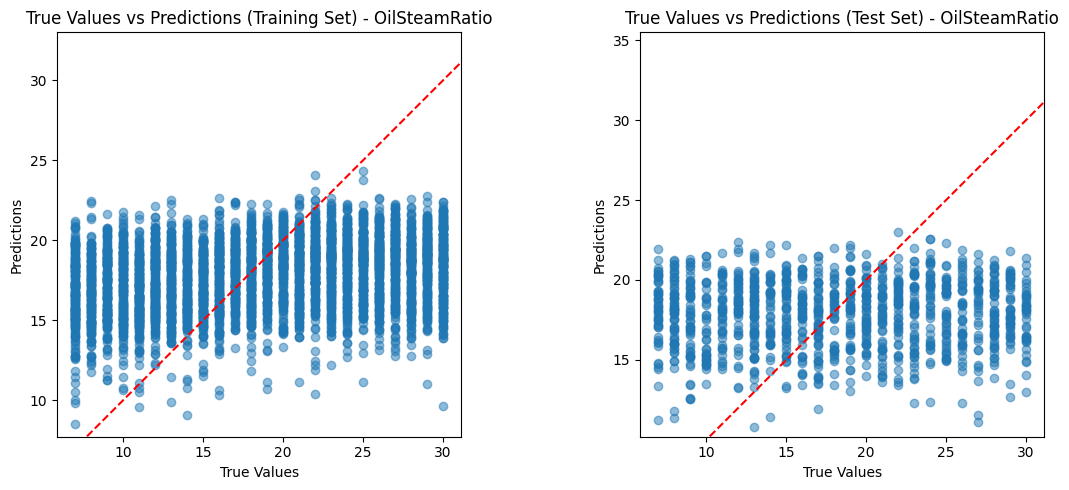

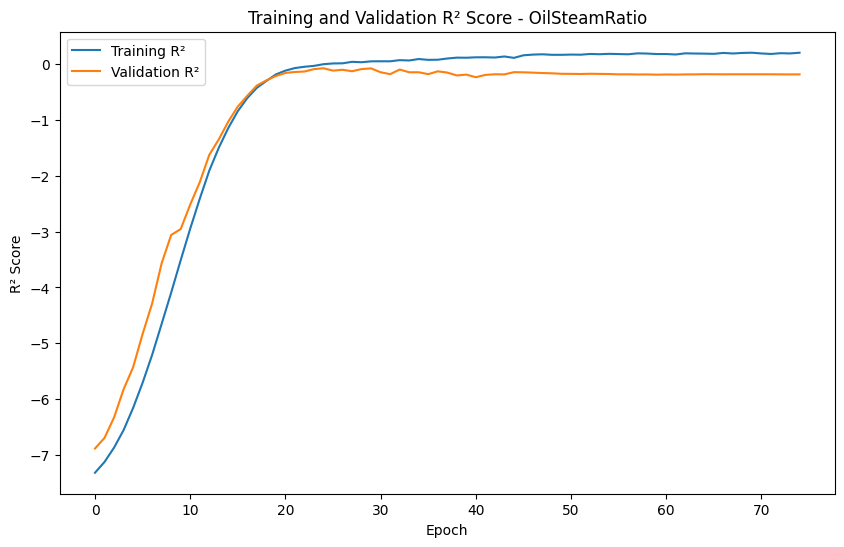

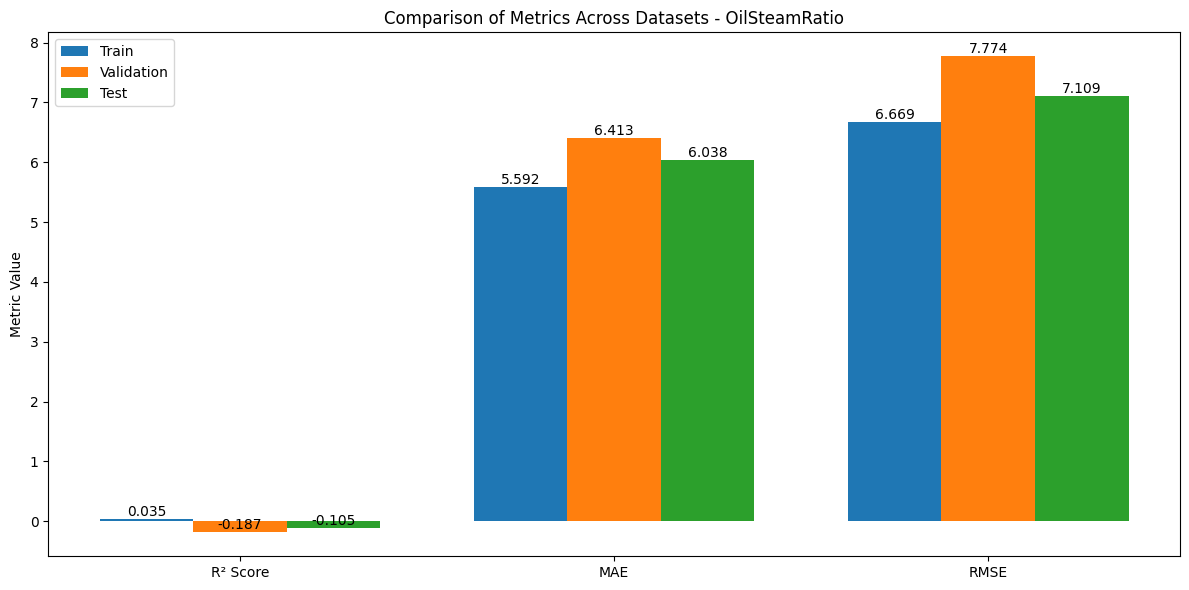

In [47]:
# Trial using neural network (architecture non-modified)

# Custom R² metric
# Custom R² metric
class R2Score(tf.keras.metrics.Metric):
    def __init__(self, name='r2_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.sum_squared_residuals = self.add_weight(name='sum_squared_residuals', initializer='zeros')
        self.sum_squared_total = self.add_weight(name='sum_squared_total', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.cast(y_pred, tf.float32)
        y_mean = tf.reduce_mean(y_true)
        sum_squared_residuals = tf.reduce_sum(tf.square(y_true - y_pred))
        sum_squared_total = tf.reduce_sum(tf.square(y_true - y_mean))
        self.sum_squared_residuals.assign_add(sum_squared_residuals)
        self.sum_squared_total.assign_add(sum_squared_total)

    def result(self):
        return 1 - self.sum_squared_residuals / (self.sum_squared_total + tf.keras.backend.epsilon())

    def reset_state(self):
        self.sum_squared_residuals.assign(0)
        self.sum_squared_total.assign(0)

# Convert data to float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Step 1: Define the model architecture with L2 regularization
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=input_shape, kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.4),
        keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.4),
        keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(1)
    ])
    return model

model = build_model((X_train.shape[1],))

# Step 2: Compile the model with Huber loss
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.Huber(),
              metrics=[R2Score(), tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.RootMeanSquaredError()])

# Step 3: Define callbacks for early stopping and learning rate reduction
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_r2_score', 
    mode='max', 
    patience=50, 
    restore_best_weights=True
)
lr_reducer = keras.callbacks.ReduceLROnPlateau(
    monitor='val_r2_score', 
    mode='max', 
    factor=0.1, 
    patience=20,
    min_lr=1e-6
)

# Step 4: Train the model
history = model.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=128,
    validation_split=0.05,
    callbacks=[early_stopping, lr_reducer],
    verbose=1
)

# Step 6: Evaluate the model on the test set and training set
train_loss, train_r2, train_mae, train_rmse = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_r2, test_mae, test_rmse = model.evaluate(X_test, y_test, verbose=0)

print("Training Set Metrics:")
print(f"Train Loss: {train_loss:.4f}")
print(f"Train R² Score: {train_r2:.4f}")
print(f"Train MAE: {train_mae:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")

print("\nTest Set Metrics:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

# Step 7: Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Step 8: Visualize the results
plt.figure(figsize=(12, 5))

# Training set plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.plot([-100, 100], [-100, 100], color='red', linestyle='--')
plt.title('True Values vs Predictions (Training Set) - OilSteamRatio')

# Test set plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.plot([-100, 100], [-100, 100], color='red', linestyle='--')
plt.title('True Values vs Predictions (Test Set) - OilSteamRatio')

plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['r2_score'], label='Training R²')
plt.plot(history.history['val_r2_score'], label='Validation R²')
plt.title('Training and Validation R² Score - OilSteamRatio')
plt.xlabel('Epoch')
plt.ylabel('R² Score')
plt.legend()
plt.show()

# Add a new plot to compare final metrics
plt.figure(figsize=(12, 6))
metrics = ['R² Score', 'MAE', 'RMSE']
train_metrics = [train_r2, train_mae, train_rmse]
val_metrics = [history.history['val_r2_score'][-1], history.history['val_mean_absolute_error'][-1], history.history['val_root_mean_squared_error'][-1]]
test_metrics = [test_r2, test_mae, test_rmse]

x = range(len(metrics))
width = 0.25

# Function to make label on top of each individual bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', rotation=0)

train_bars = plt.bar([i - width for i in x], train_metrics, width, label='Train', align='center')
val_bars = plt.bar(x, val_metrics, width, label='Validation', align='center')
test_bars = plt.bar([i + width for i in x], test_metrics, width, label='Test', align='center')

autolabel(train_bars)
autolabel(val_bars)
autolabel(test_bars)

plt.ylabel('Metric Value')
plt.title('Comparison of Metrics Across Datasets - OilSteamRatio')
plt.xticks(x, metrics)
plt.legend()

# Adjust the plot to prevent clipping of tick-labels
plt.tight_layout()
plt.show()

The hyperparameters in the code I provided are a good starting point, but they're not necessarily optimized for best performance. Optimal hyperparameters can vary significantly depending on the specific dataset and problem. Here's my perspective on the current hyperparameters and potential areas for improvement:

1. Network architecture:
   - The current architecture (128-64-32-16-8 neurons) is reasonably deep and wide, but it might not be optimal for your specific problem.
   - You could experiment with different numbers of layers and neurons per layer.

2. Learning rate:
   - The current learning rate (0.001) is a common default, but it might not be ideal for your case.
   - You could try a learning rate scheduler or different initial learning rates.

3. Batch size:
   - The current batch size (32) is a common choice, but you might get better results with a different value.
   - Try values like 16, 64, or 128 to see if they improve performance.

4. Dropout rate:
   - The current dropout rate (0.3) is moderate. You could try different rates (e.g., 0.2, 0.4, 0.5) to see if they improve generalization.

5. Early stopping patience:
   - The current patience (20 epochs) might be too long or too short depending on your dataset size and complexity.

6. Learning rate reduction:
   - The current factor (0.5) and patience (5 epochs) for learning rate reduction could be adjusted.

7. Activation functions:
   - We're using ReLU activation, which is a good default, but you could experiment with others like LeakyReLU or ELU.

8. Optimizer:
   - We're using Adam, which is generally a good choice, but you could try others like RMSprop or SGD with momentum.

To find the best hyperparameters, you could:

1. Use random search or grid search with cross-validation to explore different combinations of hyperparameters.

2. Use more advanced hyperparameter optimization techniques like Bayesian optimization (e.g., using libraries like Optuna or Hyperopt).

3. Try automated machine learning (AutoML) tools that can search for optimal architectures and hyperparameters.

Here's an example of how you might set up a simple random search:

```python
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

def create_model(neurons1=128, neurons2=64, neurons3=32, dropout_rate=0.3, learning_rate=0.001):
    model = keras.Sequential([
        keras.layers.Dense(neurons1, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(neurons2, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(neurons3, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(1)
    ])
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[tf.keras.metrics.RSquare()])
    return model

model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=32, verbose=0)

param_dist = {
    'neurons1': [64, 128, 256],
    'neurons2': [32, 64, 128],
    'neurons3': [16, 32, 64],
    'dropout_rate': [0.2, 0.3, 0.4],
    'learning_rate': [0.0001, 0.001, 0.01],
    'batch_size': [16, 32, 64]
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=20, cv=3, scoring='r2')
random_search_results = random_search.fit(X_train_scaled, y_train)

print("Best parameters:", random_search_results.best_params_)
print("Best R² score:", random_search_results.best_score_)
```

This script will perform a random search over the specified hyperparameter space. You can adjust the ranges and add more hyperparameters as needed.

Remember, hyperparameter optimization can be computationally expensive, so you might need to run this on a powerful machine or cloud service if you have a large dataset or complex model.

## Machine Learning Algorithm

### Helper Function

First we will define some functions that will help us in the process of training and evaluation.

In [48]:
# Import metrics score that will be evalueated
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import time

# Evaluation score calculation
def eval_regression(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # Calculate metrics
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)

    rmse_test = mean_squared_error(y_test, y_pred, squared=False)
    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)

    mape_test = mean_absolute_percentage_error(y_test, y_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
    
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)

    # Print evaluation scores
    print(f"MAE Score (Test Set): {mae_test:.2f}")
    print(f"MAE Score (Train Set): {mae_train:.2f}")
    print(f"RMSE Score (Test Set): {rmse_test:.2f}")
    print(f"RMSE Score (Train Set): {rmse_train:.2f}")
    print(f"MAPE Score (Test Set): {mape_test:.2f}")
    print(f"MAPE Score (Train Set): {mape_train:.2f}")
    print(f"R2 Score (Test Set): {r2_test:.2f}")
    print(f"R2 Score (Train Set): {r2_train:.2f}")

    # Cross Validation
    cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)
    score = cross_validate(model, X_train, y_train, cv=cv, scoring='r2', return_train_score=True)
    cv_test = score['test_score'].mean()
    cv_train = score['train_score'].mean()
    print(f"R2 Score (Crossval Test): {cv_test:.2f}") 
    print(f"R2 Score (Crossval Train): {cv_train:.2f}")

    # Return a dictionary of all metrics
    return {
        'mae_test': mae_test,
        'mae_train': mae_train,
        'rmse_test': rmse_test,
        'rmse_train': rmse_train,
        'mape_test': mape_test,
        'mape_train': mape_train,
        'r2_test': r2_test,
        'r2_train': r2_train,
        'cv_r2_test': cv_test,
        'cv_r2_train': cv_train
    }

def grid_pipe(pipedict, hyperdict, scoring='r2', display=True):
    fitted_models = {}
    fit_time = []
    for name, pipeline in pipedict.items():

    # Construct grid search
        cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)
        model = GridSearchCV(estimator=pipeline,
                             param_grid=hyperdict[name],
                             scoring=scoring,
                             cv=cv, verbose=2, n_jobs=-1, return_train_score = True, error_score='raise')

        # Fit using grid search
        start = time.perf_counter()
        model.fit(X_train, y_train)
        end = time.perf_counter()
        fit_time.append(round(end-start, 2))

        # Append model
        fitted_models[name]=model
        if display:
            #Print when the model has been fitted
            print(f'The {name} model has been fitted.')
            # print fit time
            print('Total Fit Time: %.3fs' % (end-start))
            # Best accuracy
            print('Best R2 Score: %.3f' % model.best_score_)
            # Best params
            print('Best params:\n', model.best_params_,'\n')

    return fitted_models, fit_time

### Train Vanilla Models

In [49]:
# Import models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Initiatialize object for each model
knn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

models = [knn, rf, xgb]

# Train models
for model in models :
    model.fit(X_train, y_train)

### Evaluate Vanilla Models

#### K-Nearest Neighbours

In [47]:
eval_regression(knn)

MAE Score (Test Set): 6.41
MAE Score (Train Set): 5.17
RMSE Score (Test Set): 7.63
RMSE Score (Train Set): 6.19
MAPE Score (Test Set): 0.46
MAPE Score (Train Set): 0.35
R2 Score (Test Set): -0.24
R2 Score (Train Set): 0.20
R2 Score (Crossval Test): -0.20
R2 Score (Crossval Train): 0.20


#### Random Forest

In [ ]:
eval_regression(rf)

MAE Score (Test Set): 5.85
MAE Score (Train Set): 2.19
RMSE Score (Test Set): 6.85
RMSE Score (Train Set): 2.58
MAPE Score (Test Set): 0.43
MAPE Score (Train Set): 0.15
R2 Score (Test Set): 0.00
R2 Score (Train Set): 0.86
R2 Score (Crossval Test): -0.01
R2 Score (Crossval Train): 0.86


#### XGBoost

In [50]:
eval_regression(xgb)

MAE Score (Test Set): 6.18
MAE Score (Train Set): 1.28
RMSE Score (Test Set): 7.44
RMSE Score (Train Set): 1.72
MAPE Score (Test Set): 0.44
MAPE Score (Train Set): 0.09
R2 Score (Test Set): -0.18
R2 Score (Train Set): 0.94
R2 Score (Crossval Test): -0.16
R2 Score (Crossval Train): 0.96


### Hyperparameter Tuning

In [51]:
?Pipeline

Init signature: Pipeline(steps, *, memory=None, verbose=False)
Docstring:     
A sequence of data transformers with an optional final predictor.

`Pipeline` allows you to sequentially apply a list of transformers to
preprocess the data and, if desired, conclude the sequence with a final
:term:`predictor` for predictive modeling.

Intermediate steps of the pipeline must be 'transforms', that is, they
must implement `fit` and `transform` methods.
The final :term:`estimator` only needs to implement `fit`.
The transformers in the pipeline can be cached using ``memory`` argument.

The purpose of the pipeline is to assemble several steps that can be
cross-validated together while setting different parameters. For this, it
enables setting parameters of the various steps using their names and the
parameter name separated by a `'__'`, as in the example below. A step's
estimator may be replaced entirely by setting the parameter with its name
to another estimator, or a transformer removed by sett

In [52]:
# Create pipeline for each of the classifiers.
pipelines = {'knn': Pipeline([('rg', KNeighborsRegressor())]),
             'randomforest': Pipeline([('rg', RandomForestRegressor(random_state = 42))]),
             'xgboost': Pipeline([('rg', XGBRegressor(random_state=42))])}

# Define Hyperparameters for each pipeline
hyperparameters_knn ={'rg__n_neighbors' : [int(x) for x in np.arange(1, 30)],
                      'rg__weights' : ['uniform', 'distance'],
                      'rg__p' : [1, 2],
                      'rg__algorithm' : ['auto', 'ball_tree', 'kd_tree']}

hyperparameters_rf ={'rg__n_estimators': [int(x) for x in np.linspace(50, 120, 5)],
                     'rg__criterion': ['squared_error', 'absolute_error'],
                     'rg__max_depth' : [int(x) for x in np.linspace(1, 10, num = 5)],
                     'rg__max_features':['sqrt'],
                     'rg__min_samples_leaf' : [int(x) for x in np.linspace(2, 10, num = 5)]}


hyperparameters_xgb ={'rg__eta': [float(x) for x in np.linspace(0.1, 0.9, 10)],
                      'rg__gamma' : [float(x) for x in np.linspace(0, 3, num = 5)],
                      'rg__max_depth': [int(x) for x in np.linspace(1, 10, num = 5)],
                      'rg__nthread' : [2, 4, 6, 8],
                      'rg__tree_method' : ['approx', 'hist']}

# Instantiate hyperparapeter dictionary
hyperparameters = {'knn':hyperparameters_knn,
                   'randomforest':hyperparameters_rf,
                   'xgboost': hyperparameters_xgb}

In [53]:
# Run the grid search
fitted_models, fit_time = grid_pipe(pipelines, hyperparameters, scoring='r2')

Fitting 25 folds for each of 348 candidates, totalling 8700 fits
The knn model has been fitted.
Total Fit Time: 706.341s
Best R2 Score: -0.025
Best params:
 {'rg__algorithm': 'ball_tree', 'rg__n_neighbors': 29, 'rg__p': 1, 'rg__weights': 'uniform'} 

Fitting 25 folds for each of 250 candidates, totalling 6250 fits
The randomforest model has been fitted.
Total Fit Time: 7925.469s
Best R2 Score: 0.001
Best params:
 {'rg__criterion': 'squared_error', 'rg__max_depth': 5, 'rg__max_features': 'sqrt', 'rg__min_samples_leaf': 10, 'rg__n_estimators': 120} 

Fitting 25 folds for each of 2000 candidates, totalling 50000 fits


KeyboardInterrupt: 

### Train Tuned Models

In [ ]:
# Import models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Initiatialize object for each model
knn_tuned = KNeighborsRegressor(algorithm='auto', n_neighbors=18, p=2, weights='distance')
rf_tuned = RandomForestRegressor(n_estimators=85, criterion='absolute_error', max_depth=7, max_features='sqrt', min_samples_leaf=2, random_state=42)
xgb_tuned = XGBRegressor(eta=0.3666666666666667, gamma=2.25, max_depth=3, nthread=2, tree_method='approx', random_state=42)

models = [knn_tuned, rf_tuned, xgb_tuned]

# Train models
for model in models :
    model.fit(X_train, y_train)

### Evaluate Tuned Models

#### K-Nearest Neighbours

In [ ]:
eval_regression(knn_tuned)

#### Random Forest

In [ ]:
eval_regression(rf_tuned)

#### XGBoost

In [ ]:
eval_regression(xgb_tuned)

## Model Comparison

Kumpul dalam 1 table, tapi belum sempat, bisa lihat di hasil2 diatas saja dulu